# **ASSIGNMENT 16** #

## ***GAS TURBINES*** ##

File : gas_turbines.csv

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_style('darkgrid')
from collections import Counter
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.layers import Input, Dense, Dropout
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend


### **Importing data from file gas_turbines.csv** ###

In [2]:
# Reading the data from the file 'gas_turbines.csv'
gt_orig_data = pd.read_csv('gas_turbines.csv')
gt_orig_data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

### **EDA (Exploratory Data Analysis)** ###

In [3]:
gt_orig_data.shape

(15039, 11)

#### *Descriptive Analysis* ####

In [4]:
gt_orig_data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [5]:
gt_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


#### *Checking for missing values* ####

In [6]:
# check for missing values
gt_orig_data.isna().sum() # The result shows that there are no missing values

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### *Checking for Null Values* ####

In [7]:
# Checking to see if there are any null values
# We can get this information using gt_orig_data.info() option as well
gt_orig_data.isnull().sum() # The result shows that there are no null values

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
# Checking for Duplicate Values
gt_orig_data.duplicated()  # if any 2 rows has same values

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [9]:
# Count of duplicated rows
gt_orig_data[gt_orig_data.duplicated()].shape # We see that there are no duplicates

(0, 11)

In [10]:
# Print the duplicated rows. Since we have duplicates it will show us the record
gt_orig_data[gt_orig_data.duplicated()] # There are no duplicates

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

#### *Checking the data structure* ####

In [11]:
# Data Structure
print(type(gt_orig_data))
gt_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(15039, 11)

In [12]:
# Checking data types
gt_orig_data.dtypes # check data types of all variables

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

#### **Visualizations** ####

In [13]:
gt_data = gt_orig_data.copy()

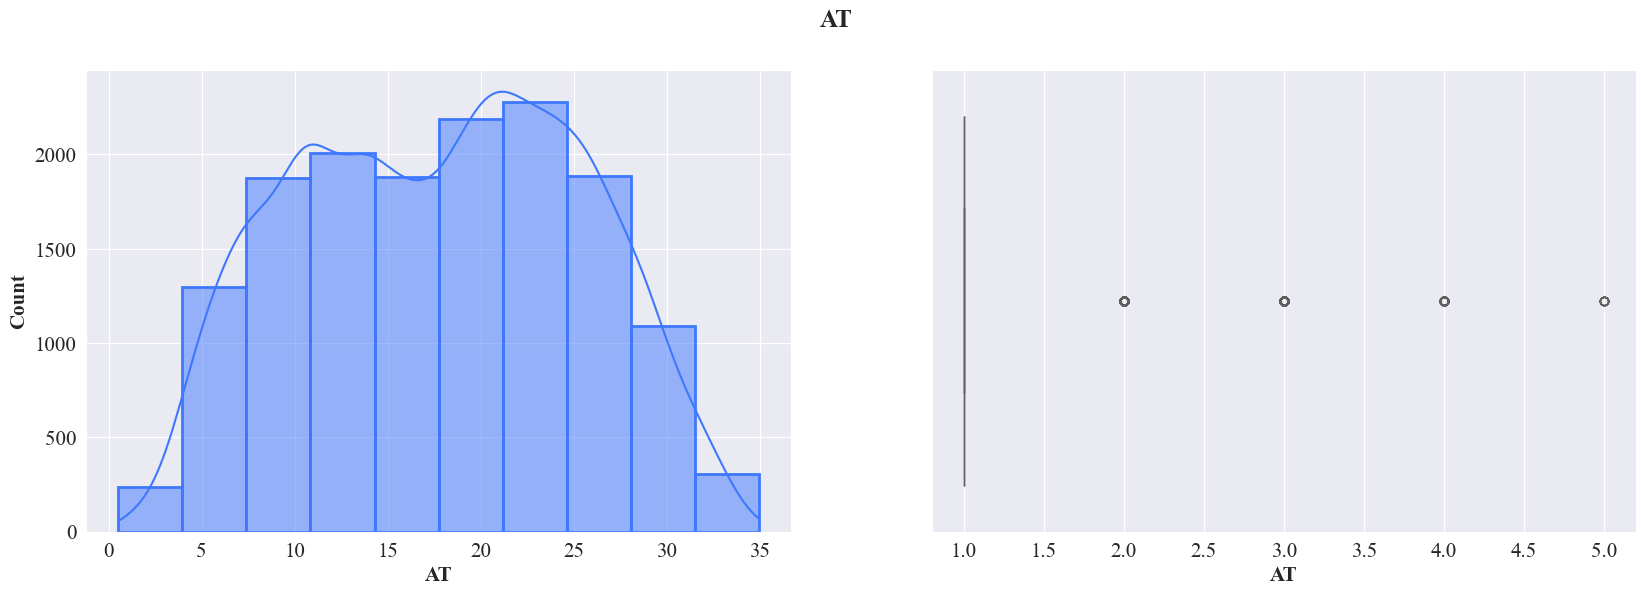

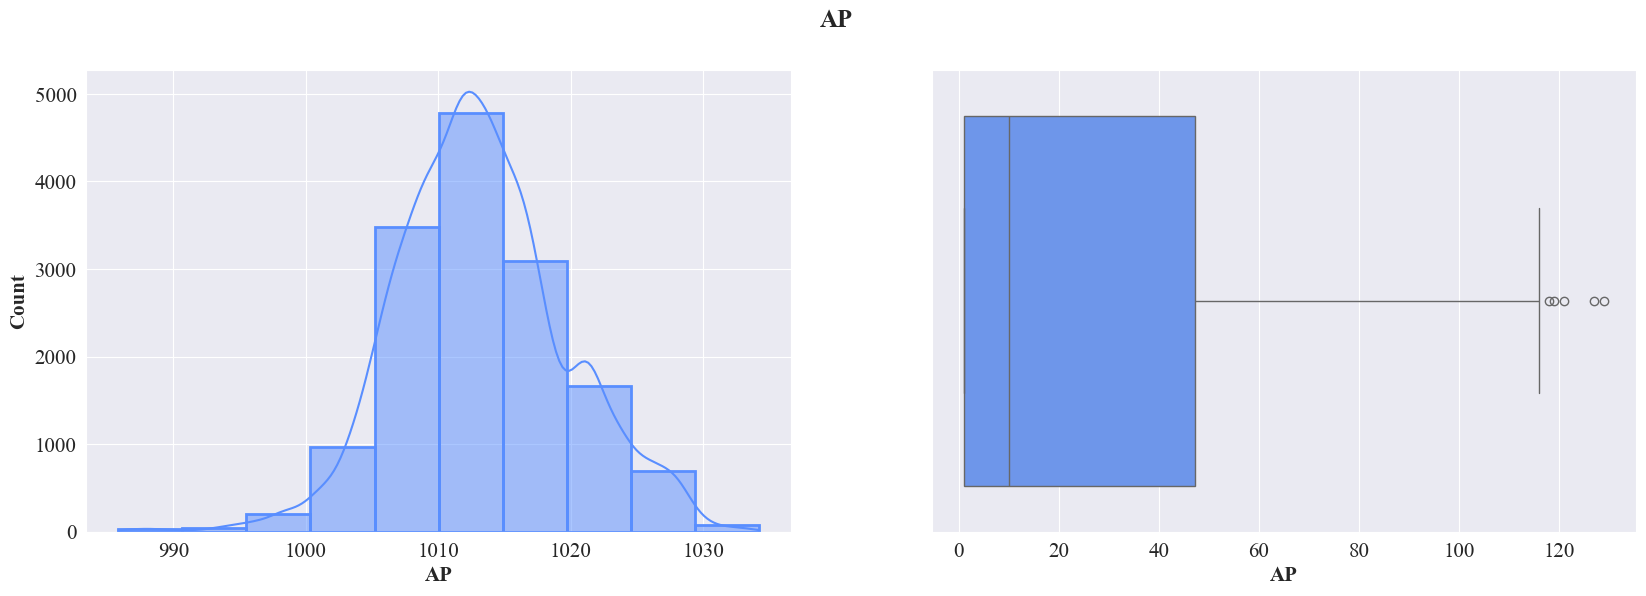

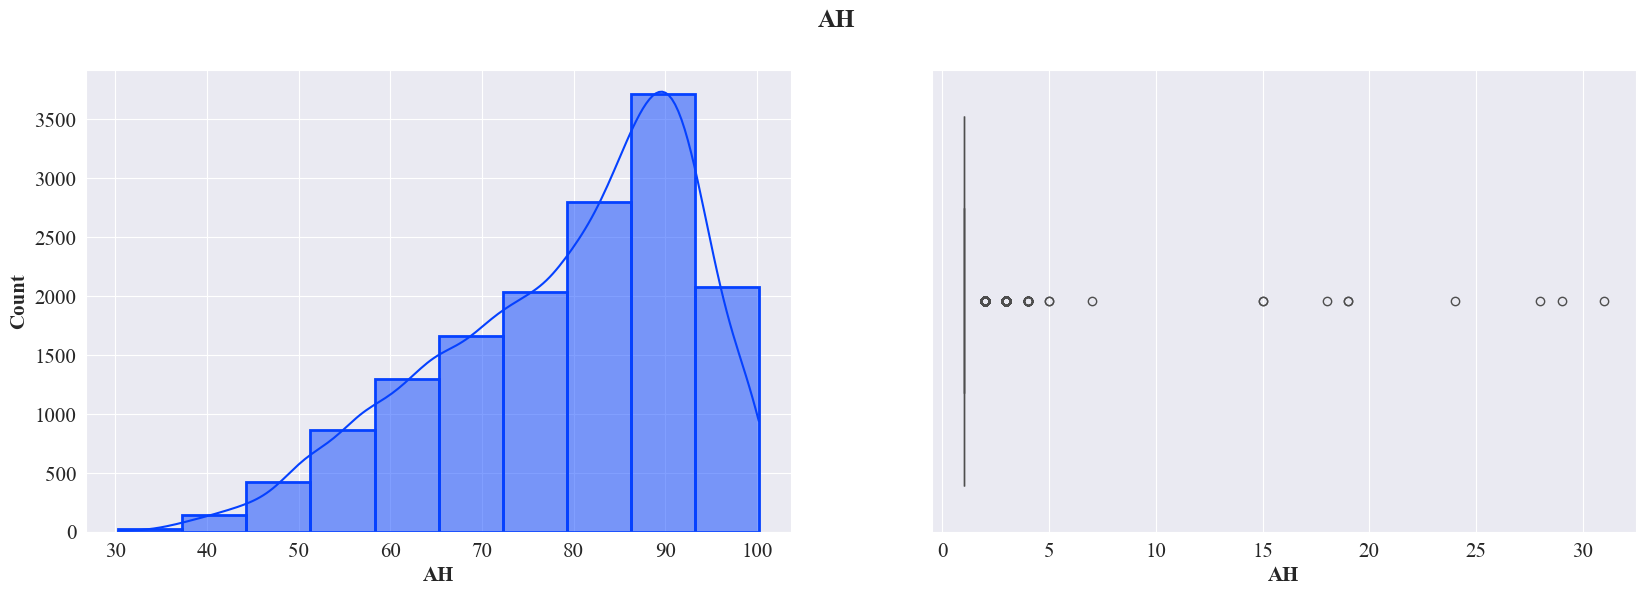

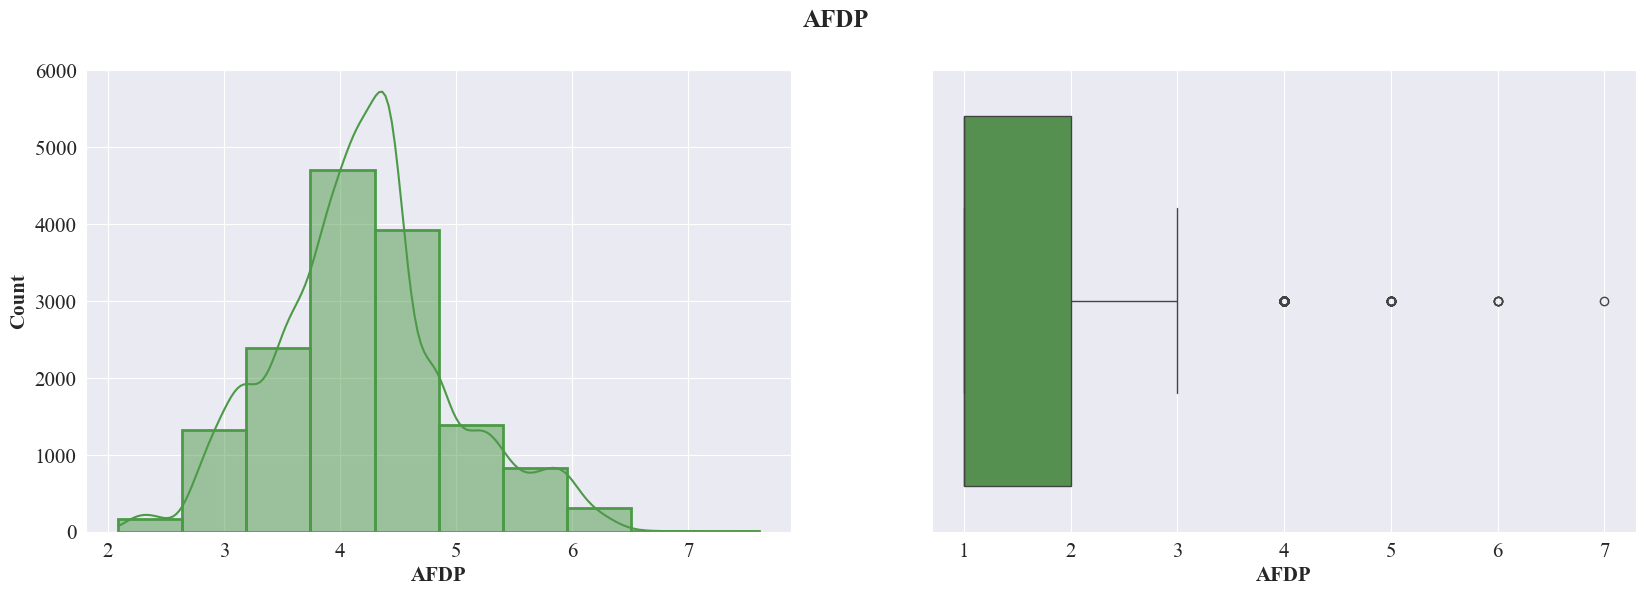

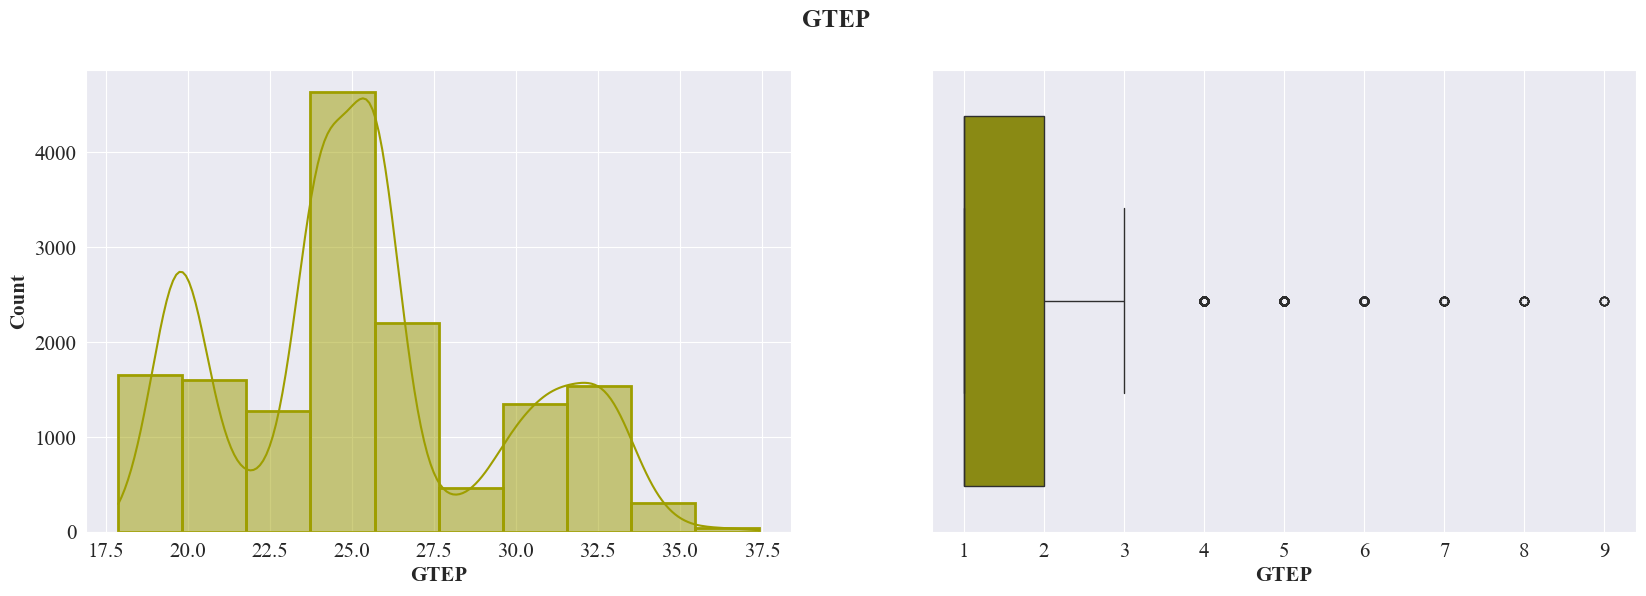

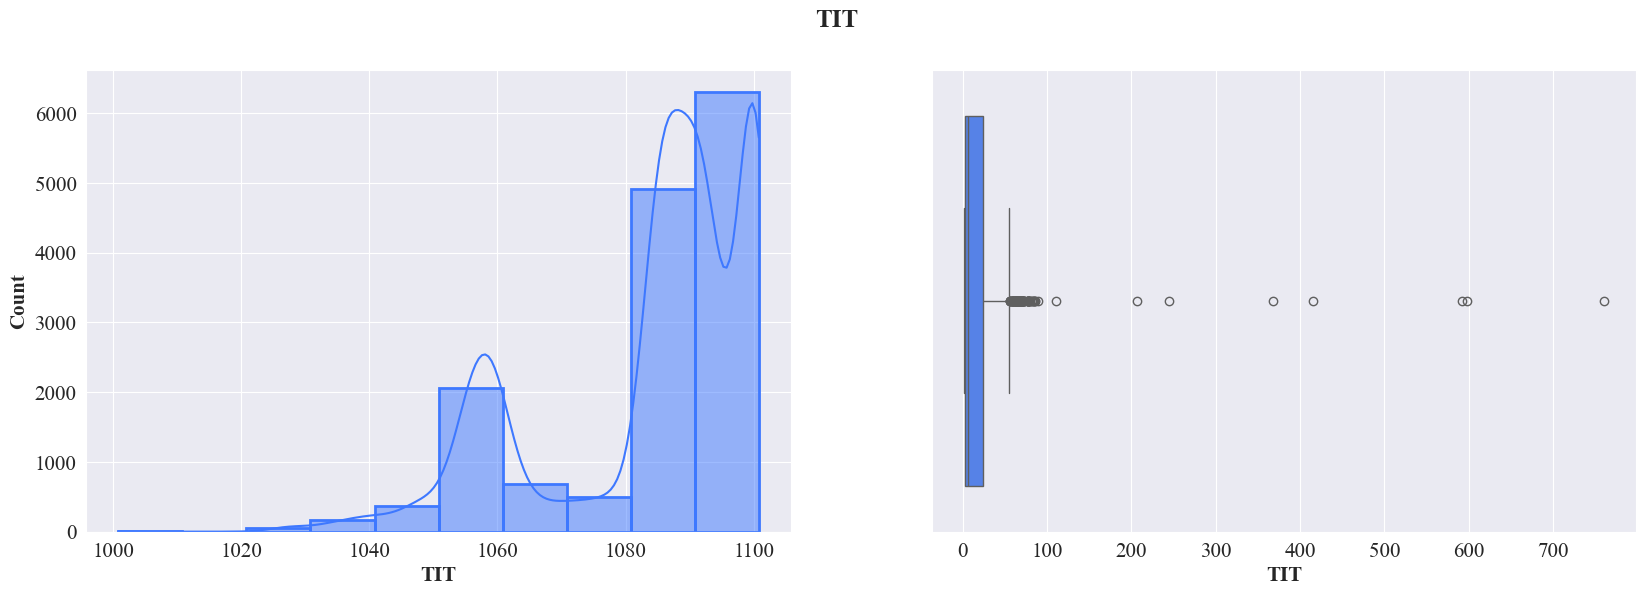

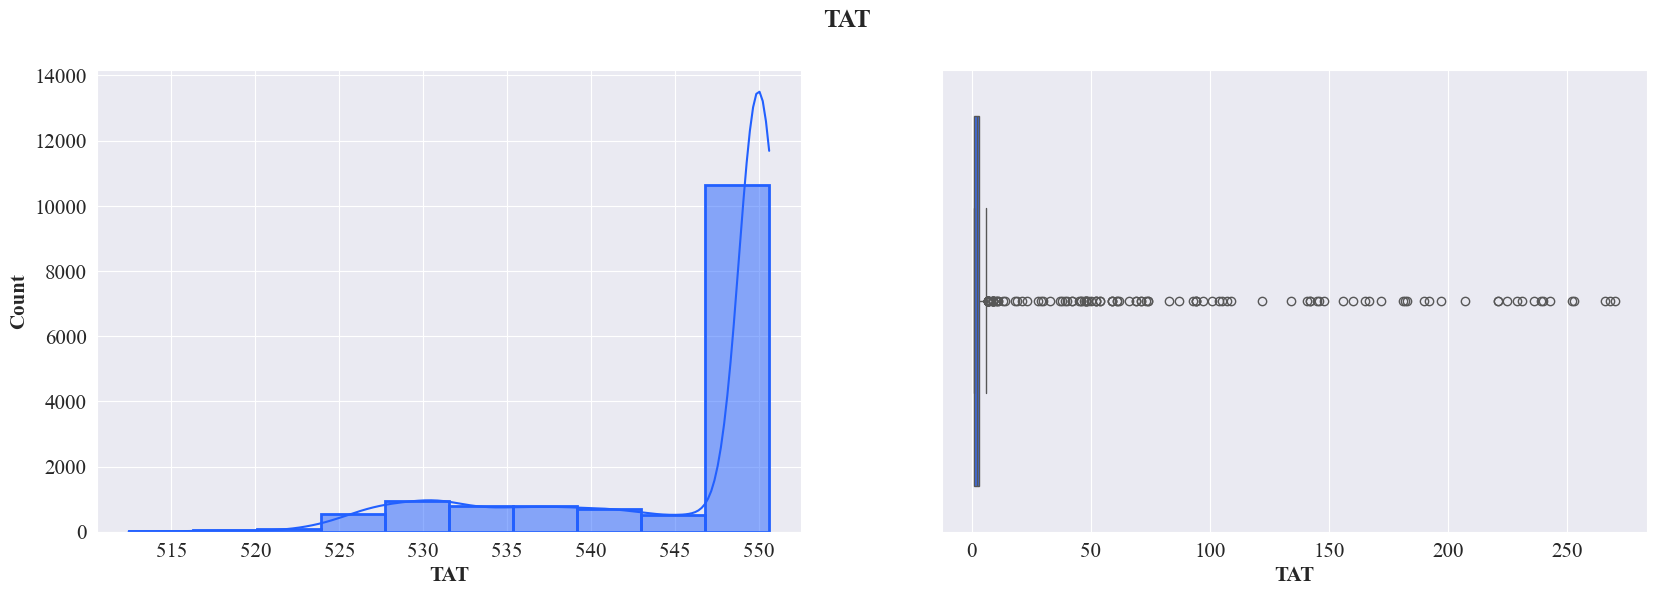

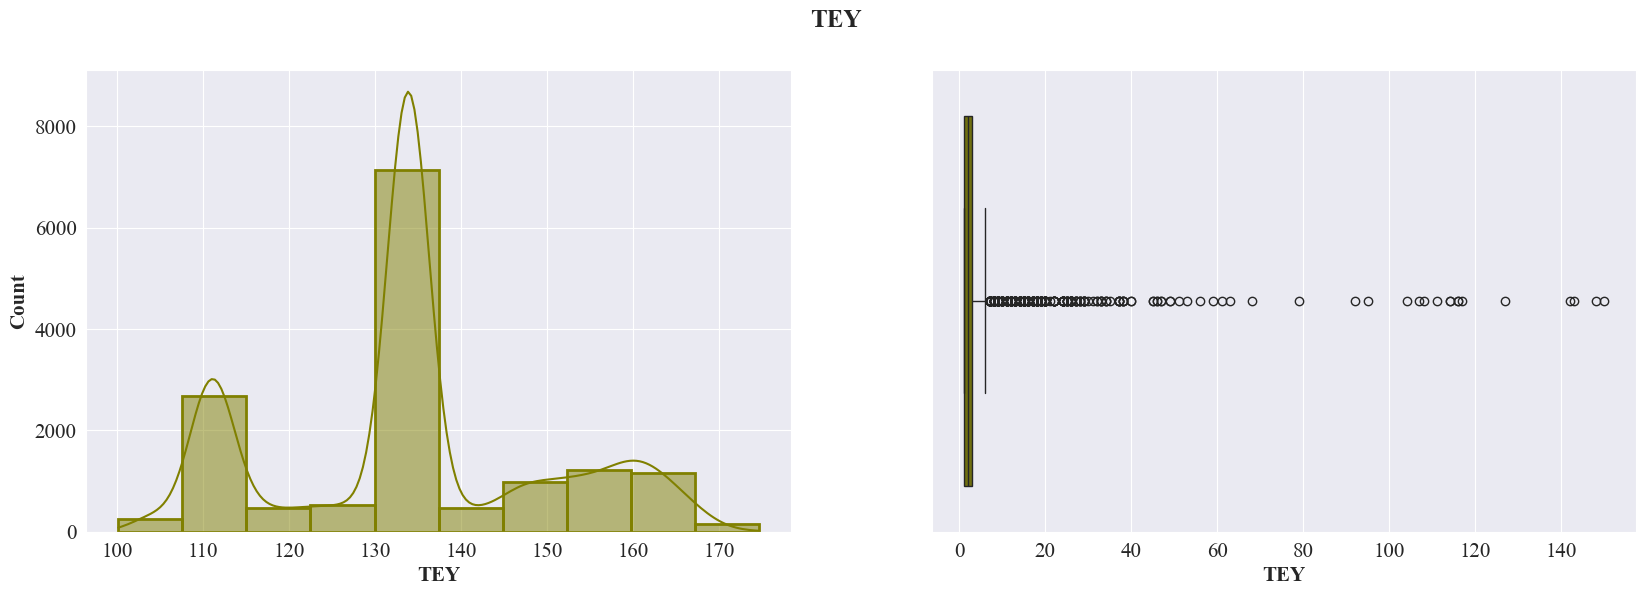

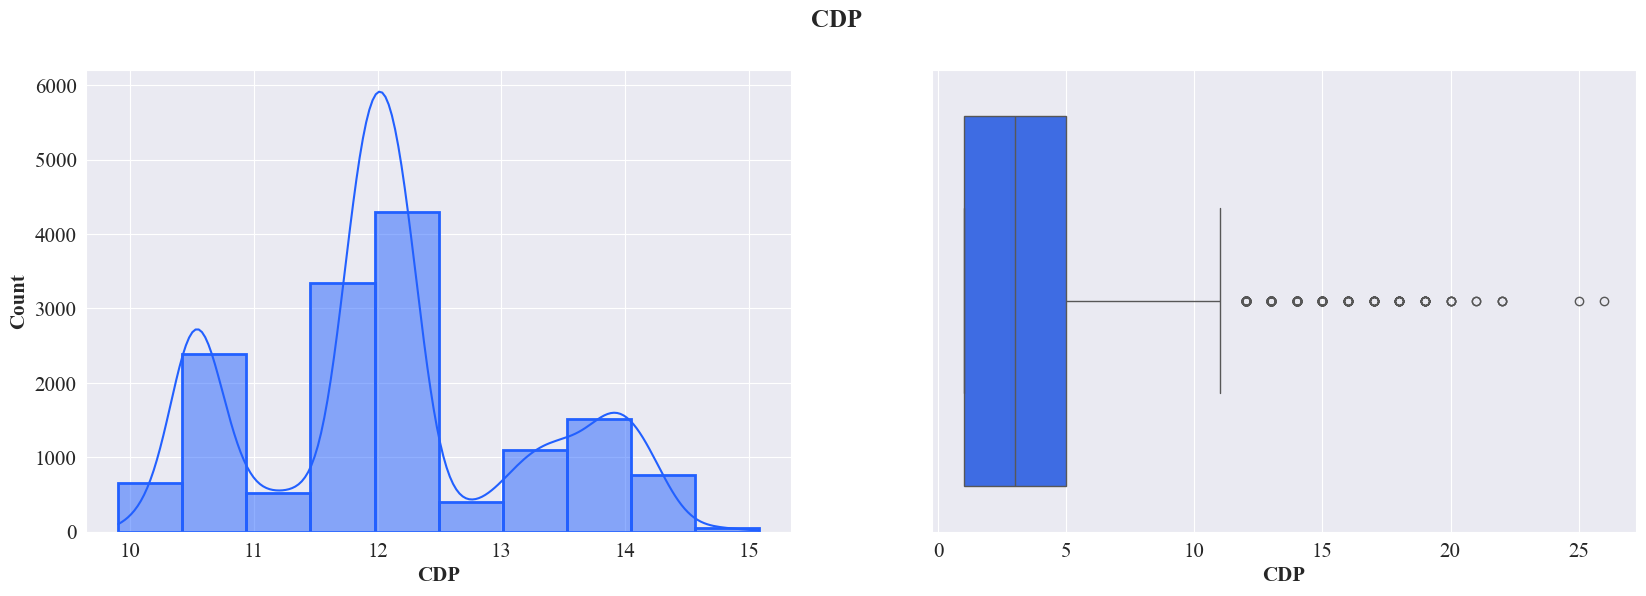

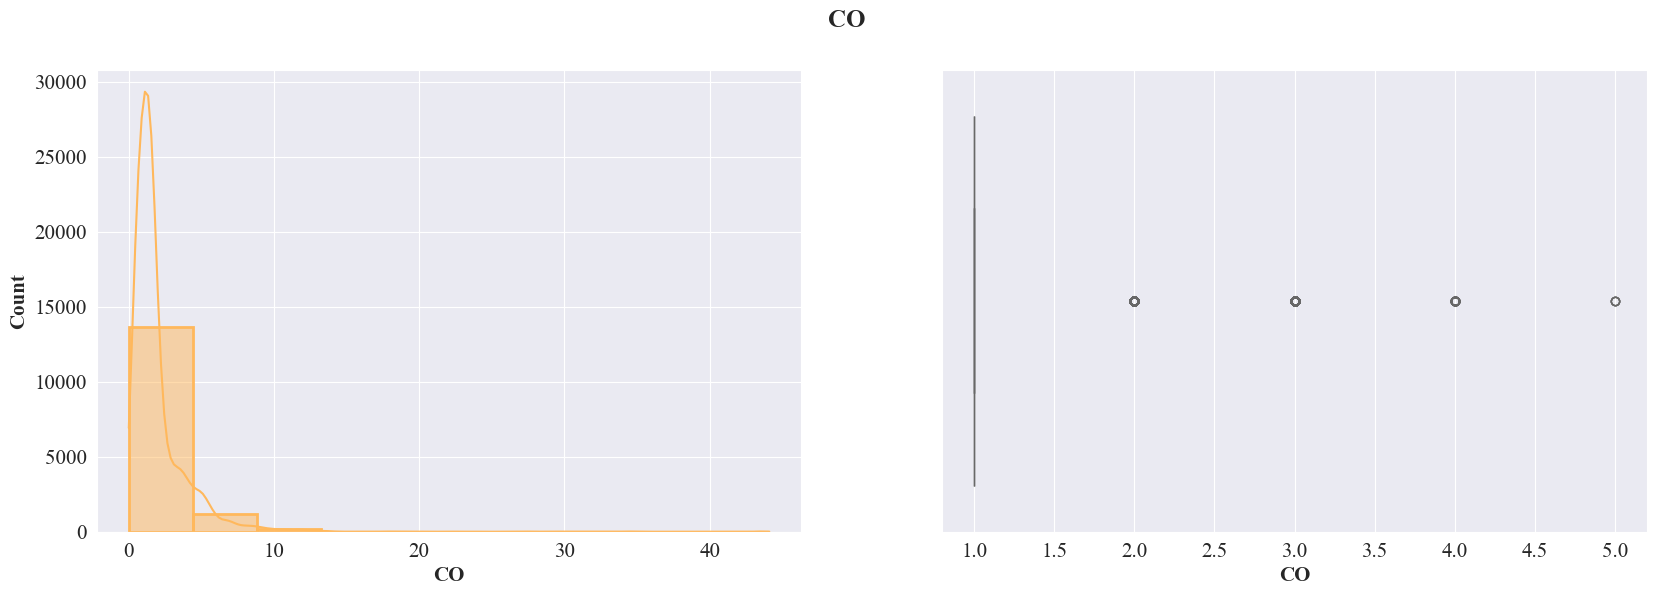

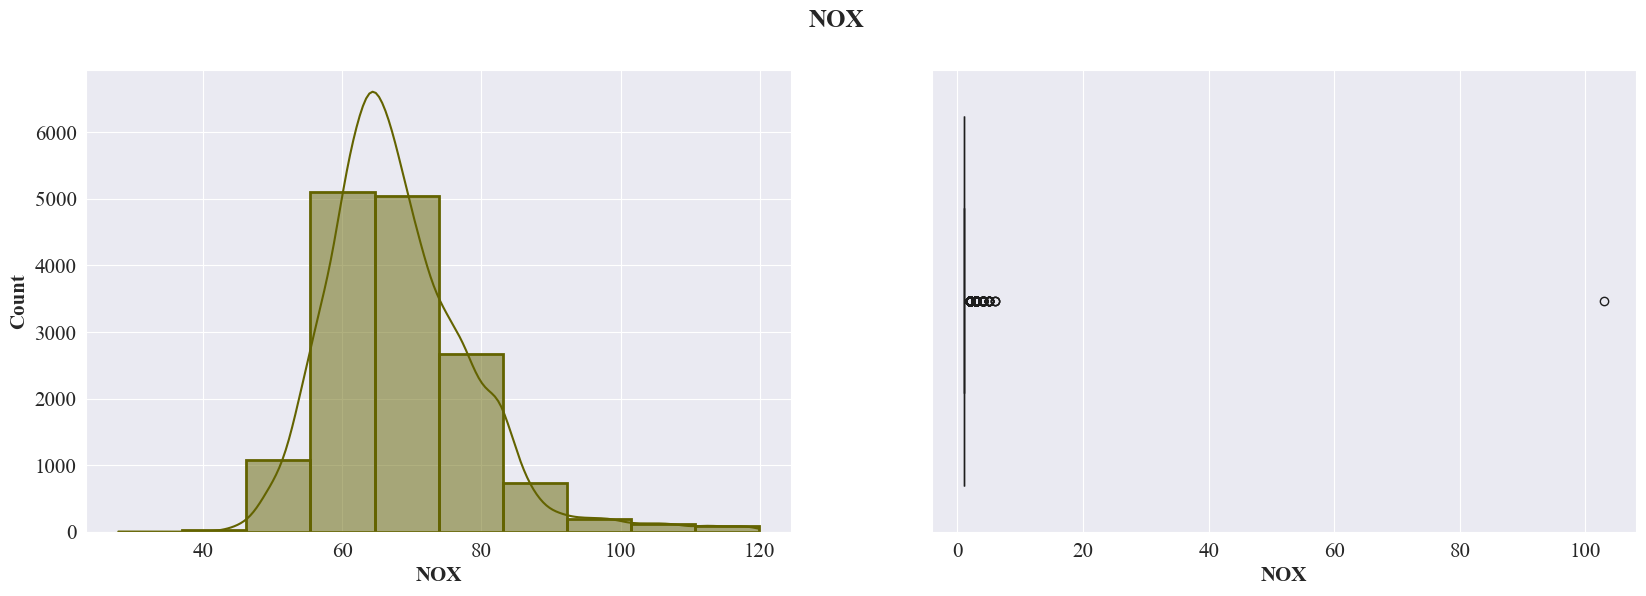

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.setp(plot.get_yticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature, weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.ylabel("Count", weight='bold', fontfamily = "Times New Roman", size = '15')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)
    plt.setp(plot.get_xticklabels(), rotation=0, fontfamily = "Times New Roman", size = '15')
    plt.xlabel(feature, weight='bold', fontfamily = "Times New Roman", size = '15')
    plt.xticks(fontfamily = "Times New Roman", size=15)
    plt.suptitle(feature, weight='bold', fontfamily = "Times New Roman", size = '18')

    #bp.set_xlabel("X Label",fontsize=30)

for cols in gt_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(gt_data,cols)

In [15]:
# Showing features with more than one outlier

def get_outliers(data):
    
    outlier_indices = []
    for cols in data.columns.tolist():
        Q1 = np.percentile(data[cols], 25)  # 1st quartile (25%)
        Q3 = np.percentile(data[cols],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)
        outlier_step = 1.5 * IQR            # outlier step
        
        # Getting the list of indices of features having outliers
        outlier_list_col = data[(data[cols] < Q1 - outlier_step) | (data[cols] > Q3 + outlier_step )].index
        
        # Adding the outlier indices for features to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print(f'The dataset contains {len(get_outliers(gt_data))} observations with more than 2 outliers') 

The dataset contains 1543 observations with more than 2 outliers


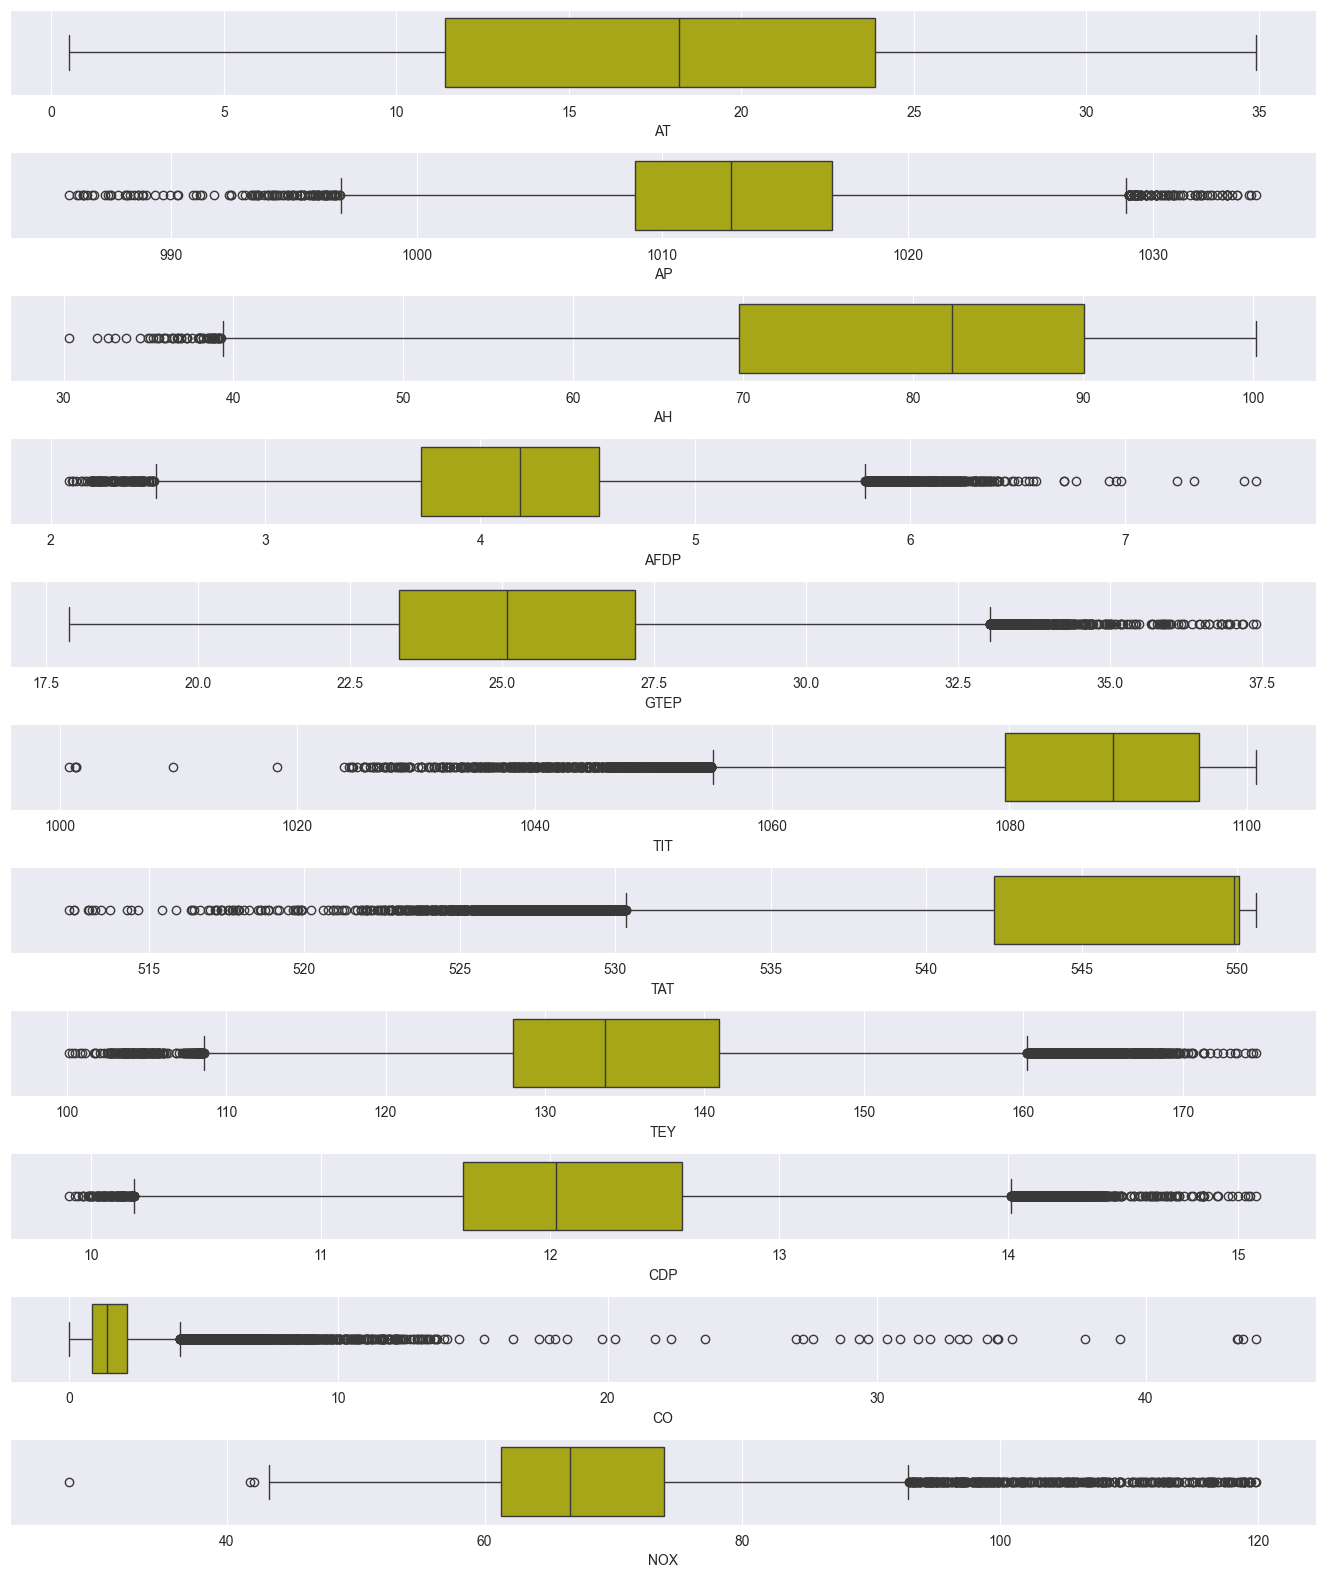

In [16]:
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
plt.tight_layout(pad=2.0)
ax_cnt = 0
for cols in (gt_data):
    sns.boxplot(x=cols,data=gt_data,color='#bebe00',ax=axes[ax_cnt])
    ax_cnt +=1

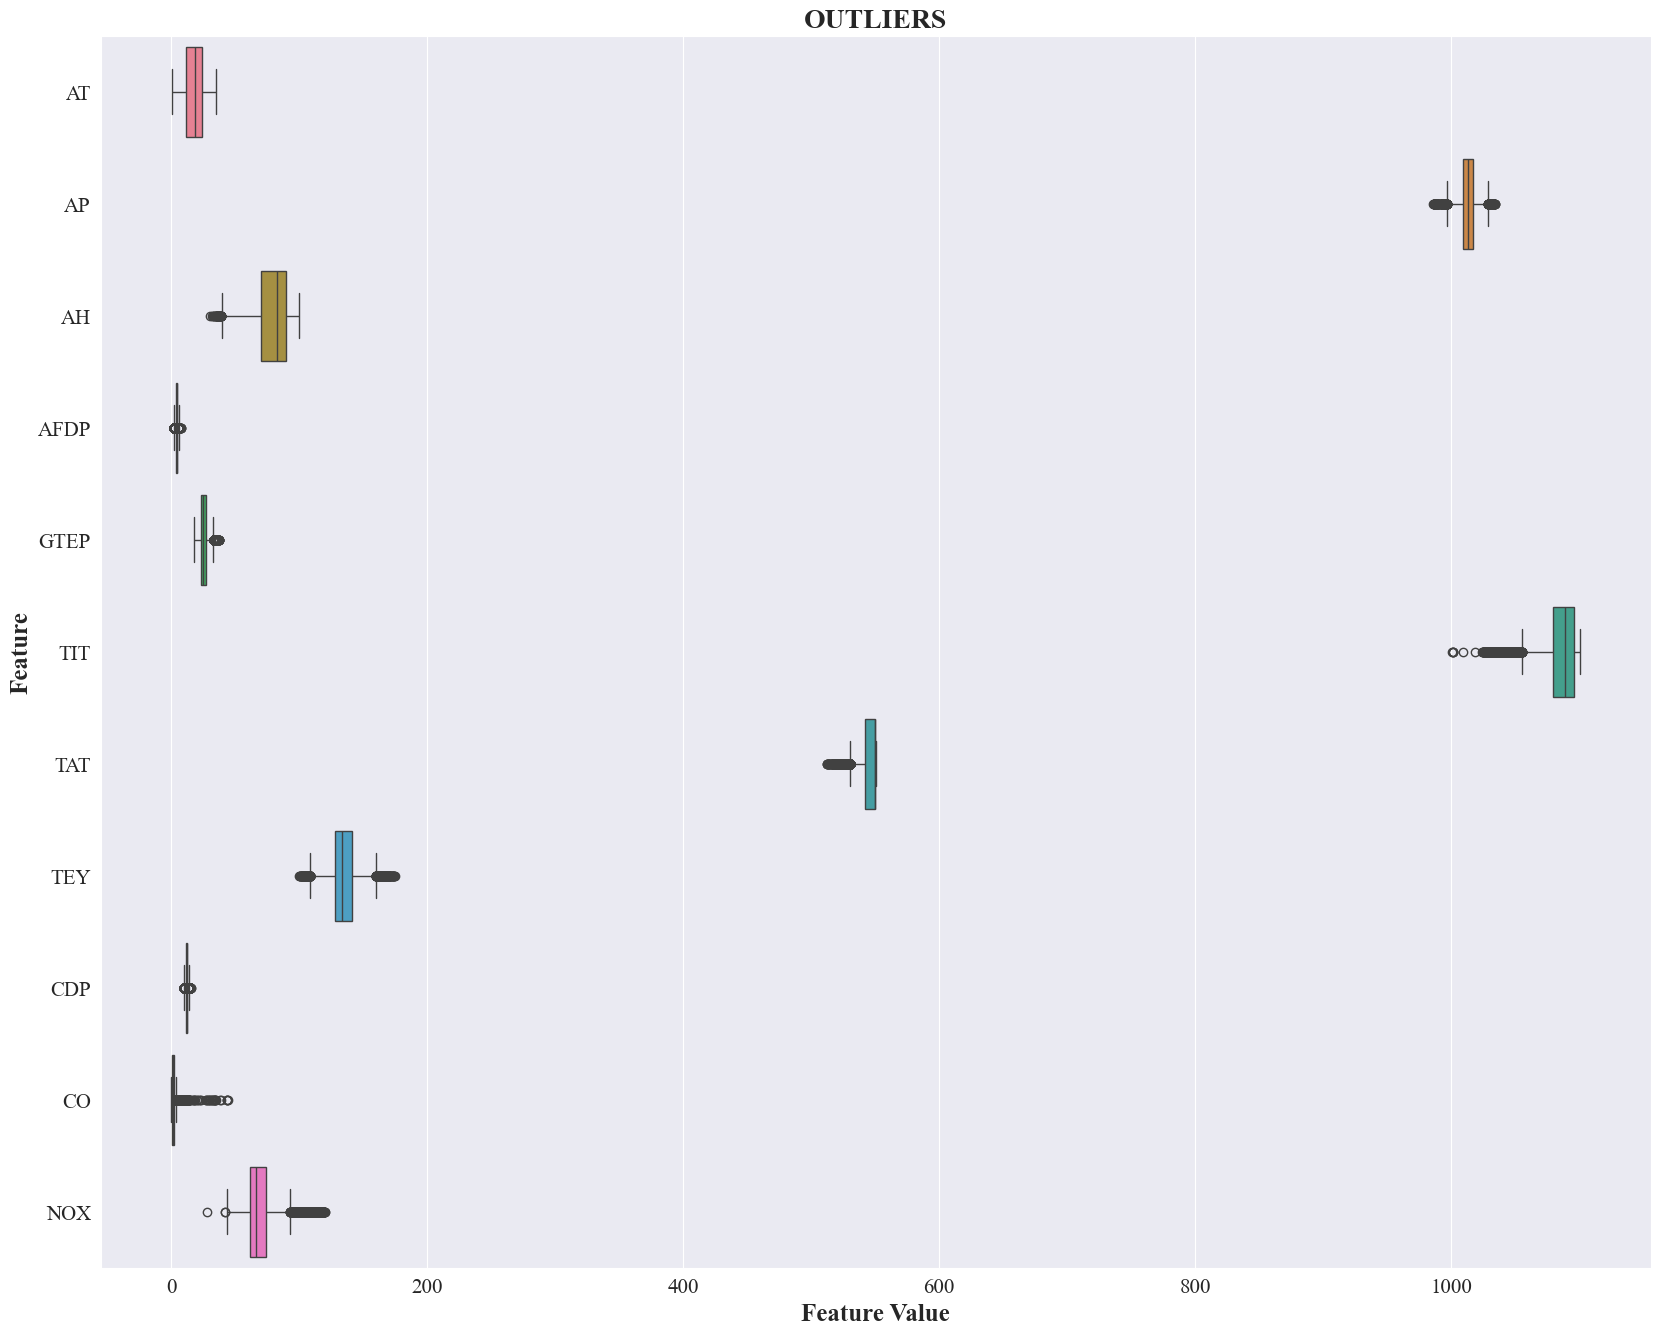

In [17]:

# Outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=gt_data, orient="h")
plt.xlabel('Feature Value', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.ylabel('Feature', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.title('OUTLIERS', weight='bold', fontfamily = "Times New Roman", size = '20')
plt.show()

### **CORRELATION MATRIX** ###

In [18]:
gt_data.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

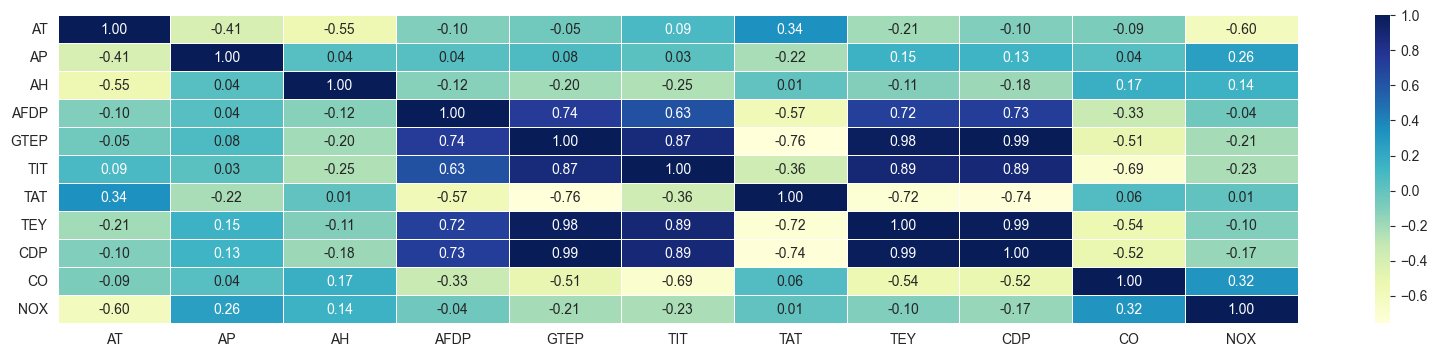

In [19]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(gt_data.corr(), annot=True, linewidths =.5, fmt ='.2f',cmap="YlGnBu",ax=ax)
plt.show()

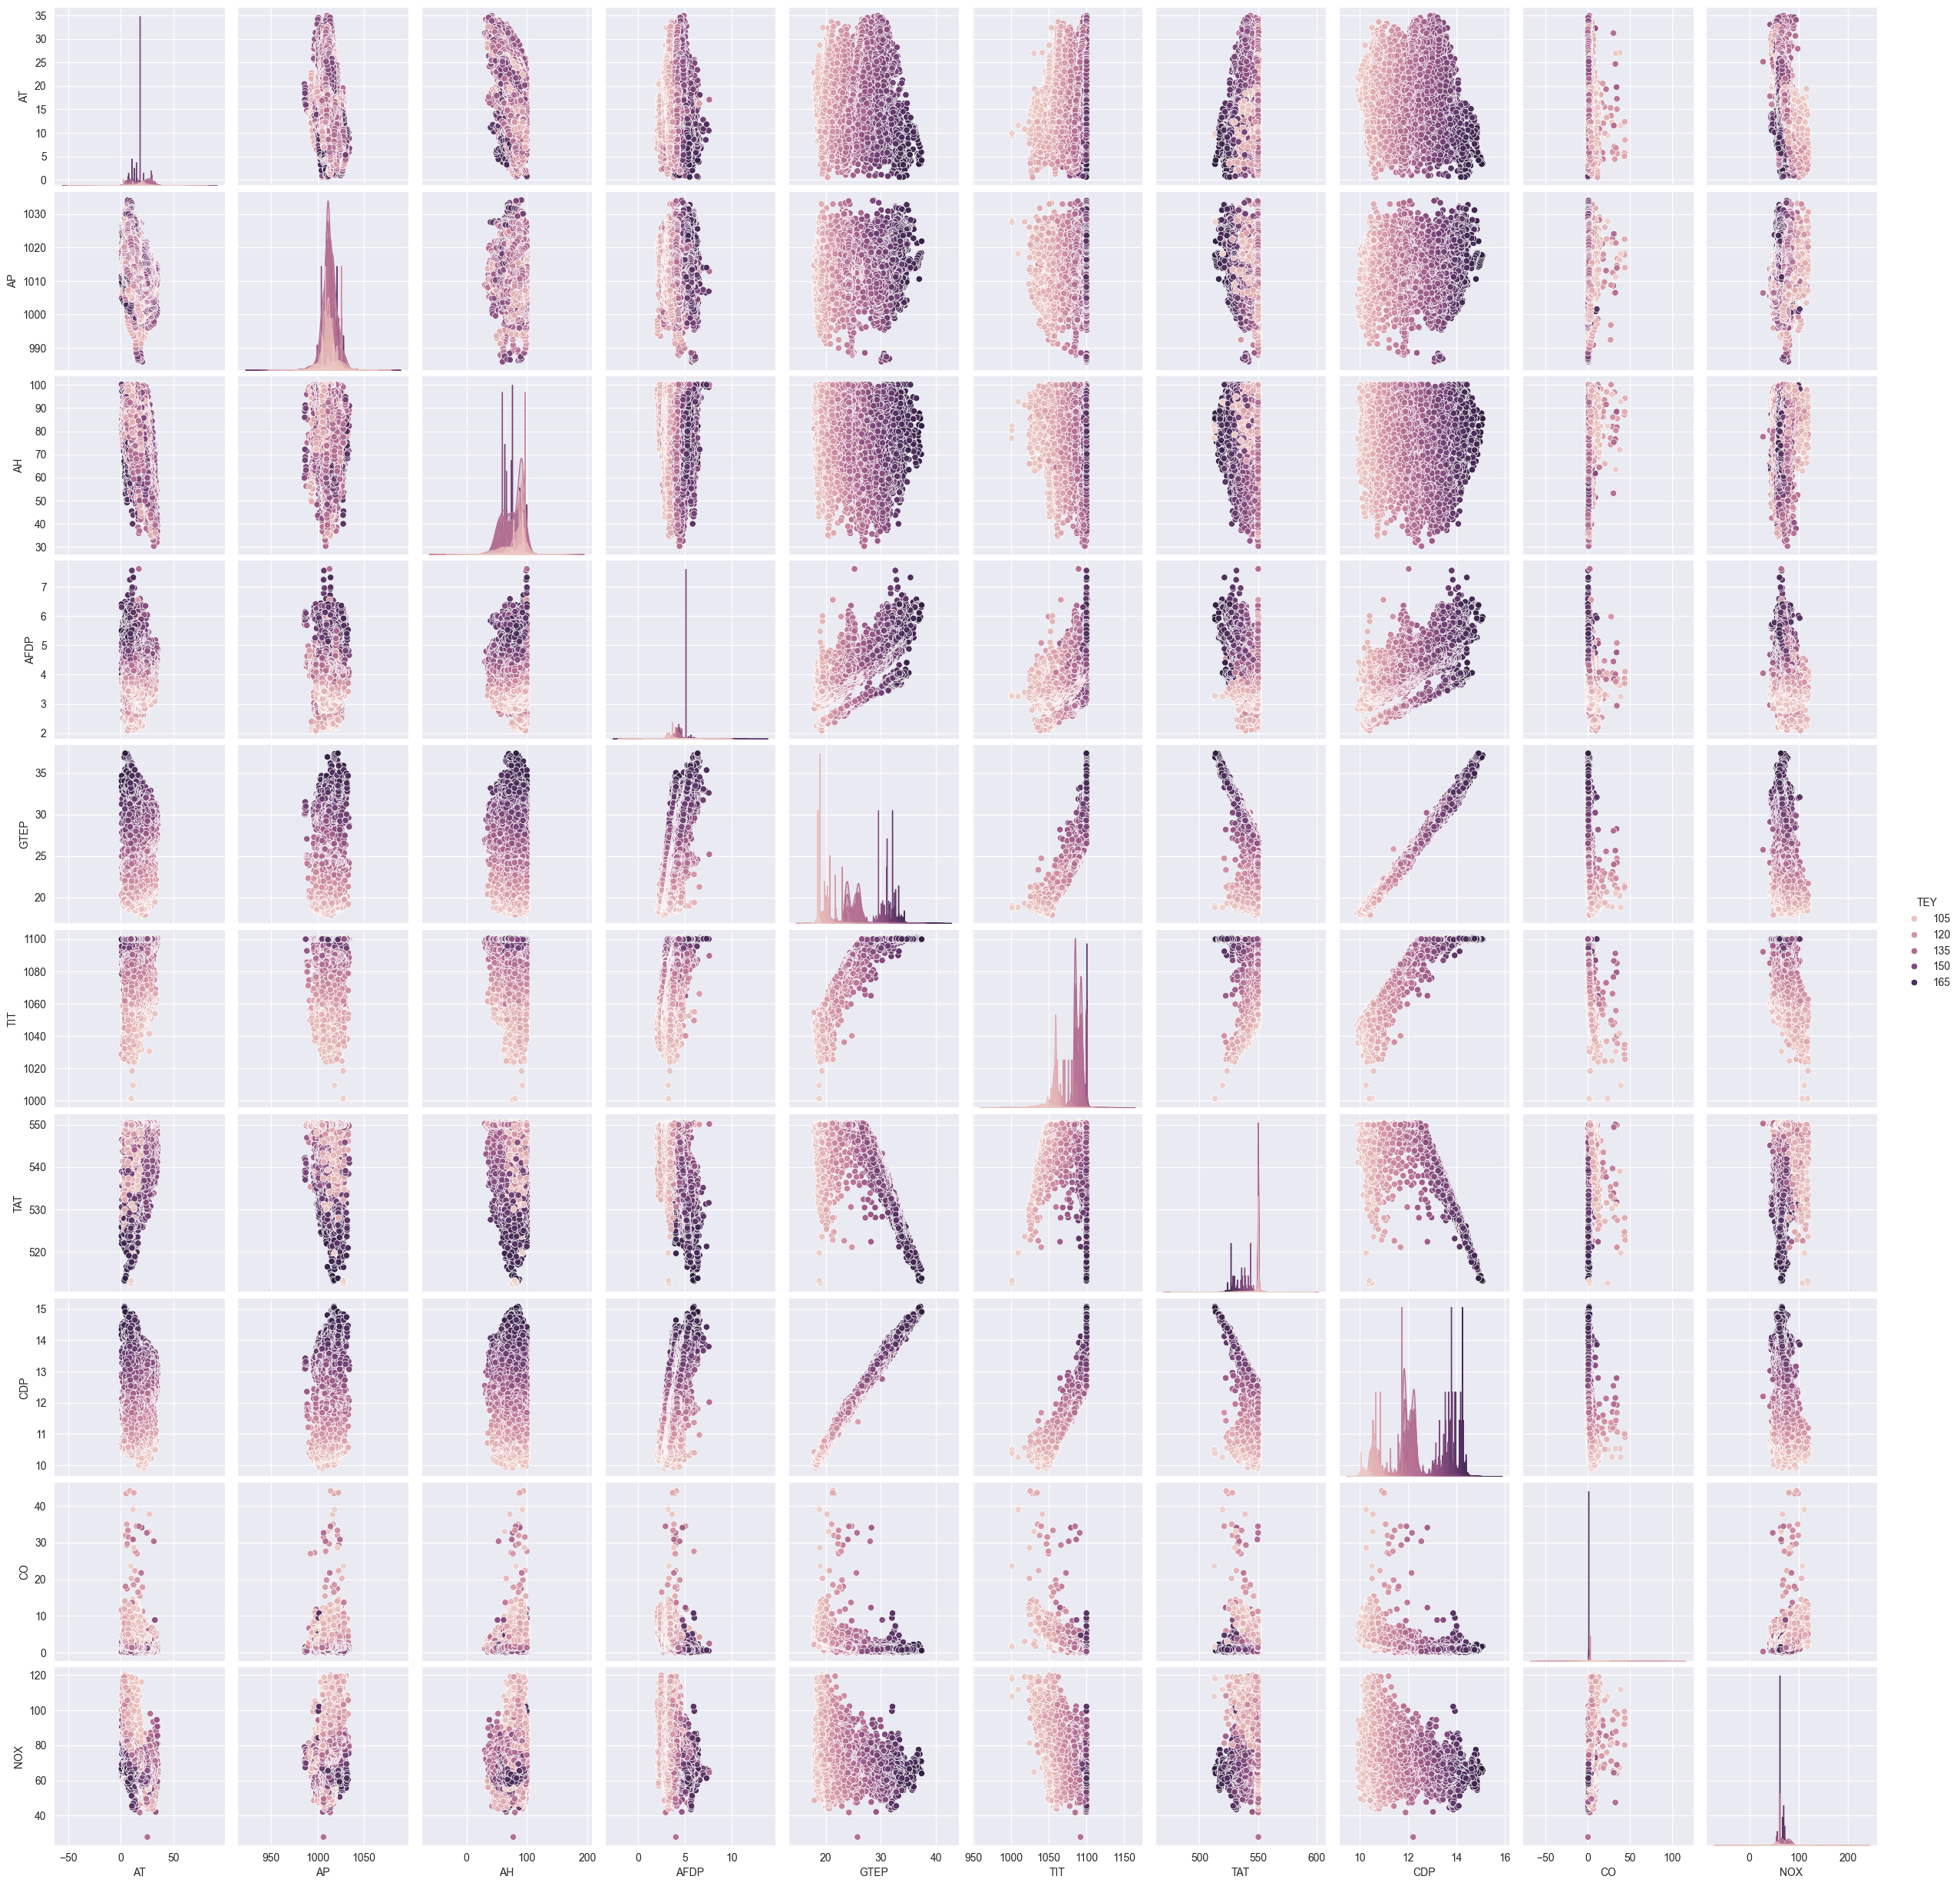

In [20]:
# Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(gt_data, hue='TEY')

Text(0.5, 1.0, 'OUTLIERS')

<Figure size 10000x2000 with 0 Axes>

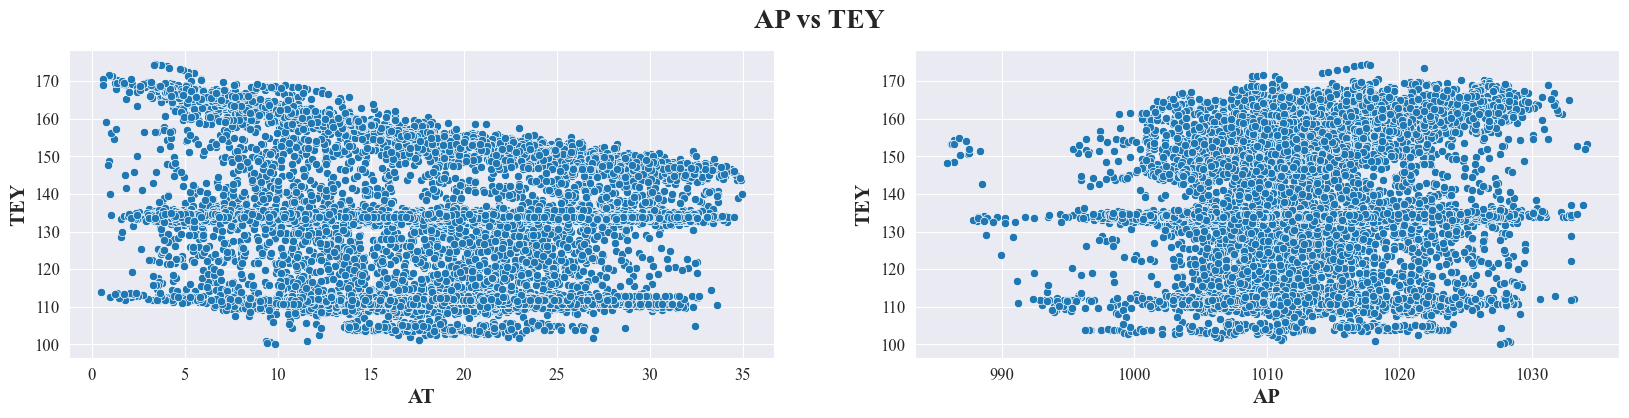

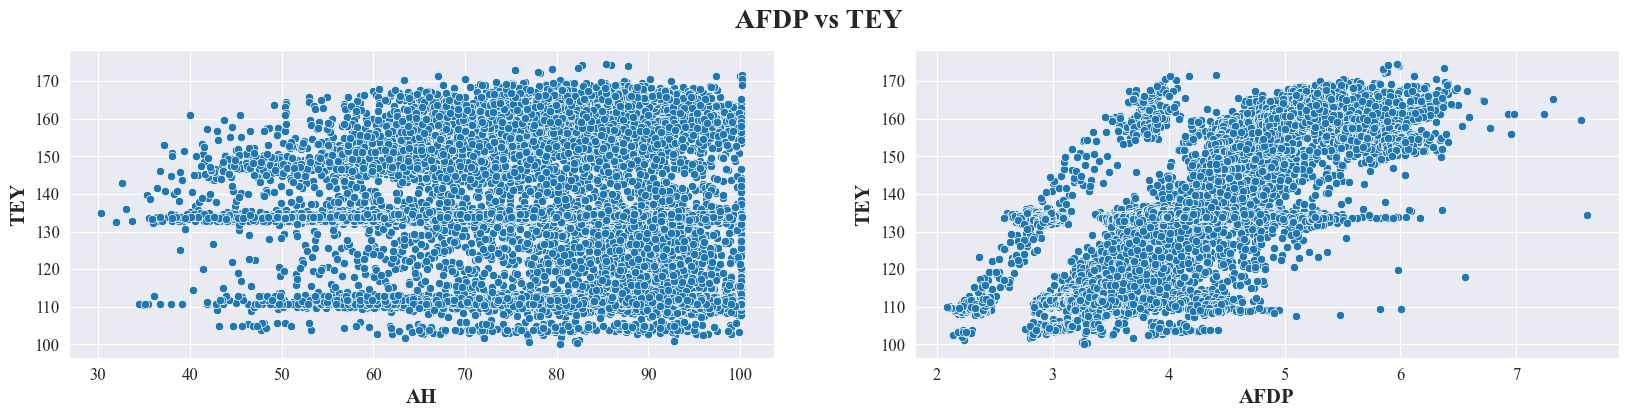

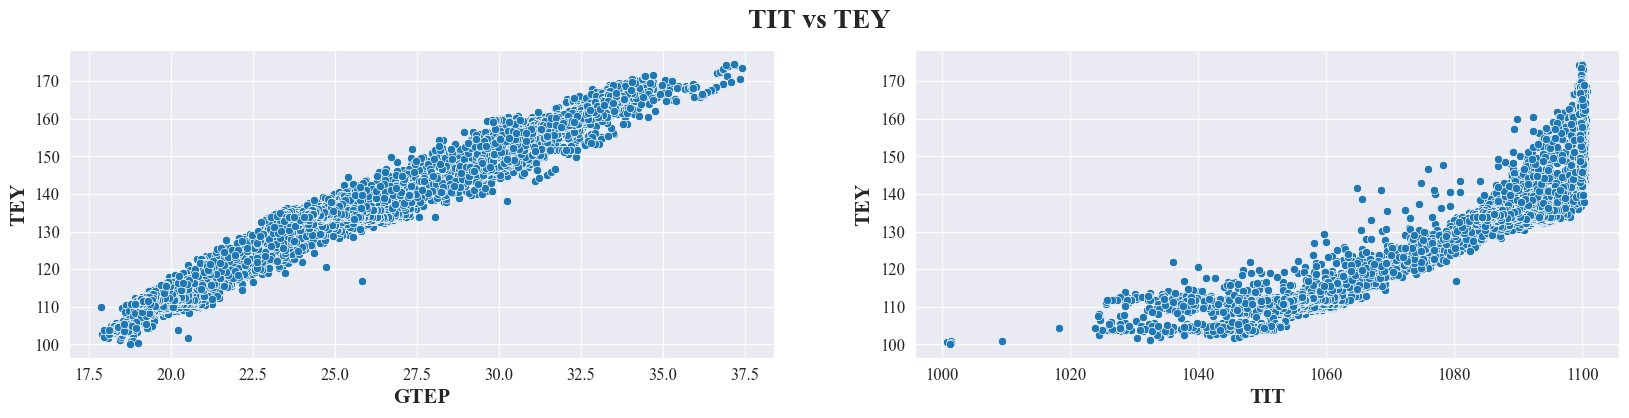

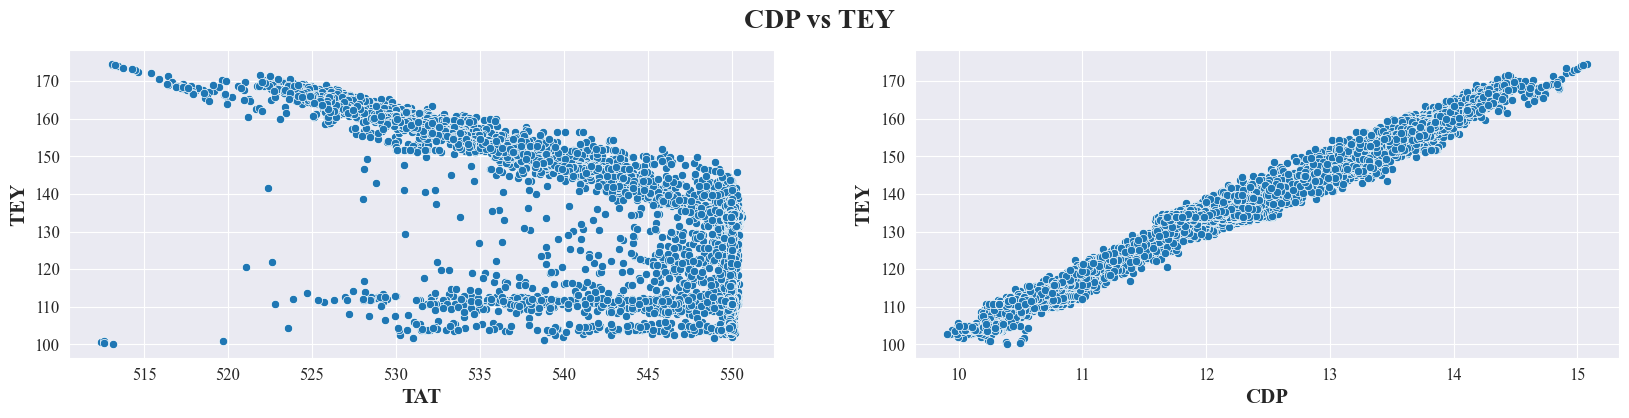

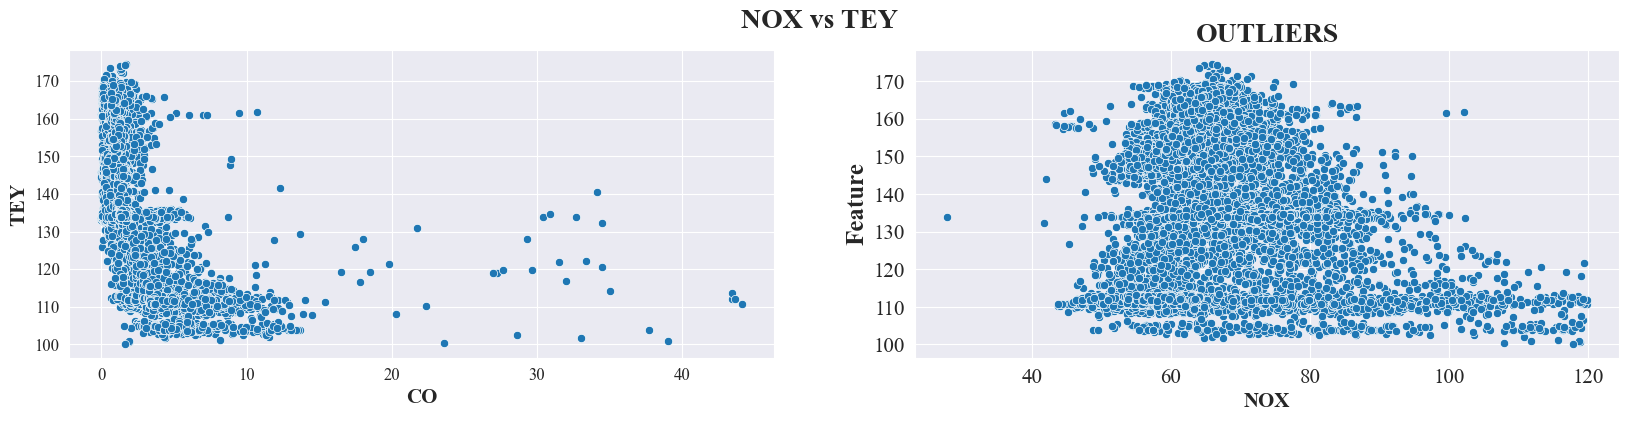

In [21]:
row = 1
t_cct = 2       # Total columns per row
ccnt = 1        # Column count
plt.figure(figsize=(100,20))
for cols in gt_data.columns:
    if (cols != "TEY"):
        if (ccnt > t_cct):      # Taking only 2 columns per row i.e., 2 graphs in a row
            ccnt = 1
        if (ccnt == 1):         # Defining the figure size only in the beginning when column count is 1
              plt.figure(figsize=(20,4))
        plt.subplot(row,t_cct,ccnt)
        sns.scatterplot(data=gt_data, x=cols, y="TEY")
        plt.xticks(fontfamily = "Times New Roman", size=12)
        plt.yticks(fontfamily = "Times New Roman", size=12)
        plt.ylabel('TEY', weight='bold', fontfamily = "Times New Roman", size = '15')
        plt.xlabel(cols, weight='bold', fontfamily = "Times New Roman", size = '15')
        if (ccnt == 2):
            plt.suptitle(f'{cols} vs TEY', weight='bold', fontfamily = "Times New Roman", size = '20')
        ccnt += 1


plt.ylabel('Feature', weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", size=15)
plt.yticks(fontfamily = "Times New Roman", size=15)
plt.title('OUTLIERS', weight='bold', fontfamily = "Times New Roman", size = '20')

In [22]:
# Defining X and Y attributes
X = gt_data.drop('TEY', axis=1)
Y = gt_data[['TEY']]

### ***Creation of the model*** ###

In [23]:
# create model
model = Sequential()
model.add(Dense(26, input_dim = 10,  activation='relu')) #1st layer
model.add(Dense(26, activation='tanh')) #2nd layer
model.add(Dense(26, activation='sigmoid')) #3rd layer
model.add(Dense(26, activation='leaky_relu')) #4th layer or op layer

In [24]:
# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

In [25]:
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [26]:
Y

TEY
0      114.70
1      114.72
2      114.71
3      114.72
4      114.72
...       ...
15034  111.61
15035  111.78
15036  110.19
15037  110.74
15038  111.58

[15039 rows x 1 columns]

In [27]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20
1008/1008 [==============================] - 4s 3ms/step - loss: 120.0095 - mean_absolute_percentage_error: 88.5455 - val_loss: 102.2088 - val_mean_absolute_percentage_error: 77.1512
Epoch 2/20
1008/1008 [==============================] - 3s 3ms/step - loss: 91.7663 - mean_absolute_percentage_error: 67.3695 - val_loss: 74.6750 - val_mean_absolute_percentage_error: 55.9988
Epoch 3/20
1008/1008 [==============================] - 3s 3ms/step - loss: 64.3706 - mean_absolute_percentage_error: 46.8357 - val_loss: 47.3651 - val_mean_absolute_percentage_error: 35.0182
Epoch 4/20
1008/1008 [==============================] - 3s 3ms/step - loss: 37.1699 - mean_absolute_percentage_error: 26.4410 - val_loss: 21.1003 - val_mean_absolute_percentage_error: 14.9316
Epoch 5/20
1008/1008 [==============================] - 3s 3ms/step - loss: 18.1479 - mean_absolute_percentage_error: 12.7875 - val_loss: 12.3858 - val_mean_absolute_percentage_error: 9.5507
Epoch 6/20
1008/1008 [=================

In [28]:
# Evalutate the model
scores = model.evaluate(X,Y)
print(f'{model.metrics_names[1]}: {scores[1]}')

470/470 [==============================] - 1s 2ms/step - loss: 11.1390 - mean_absolute_percentage_error: 8.4655
mean_absolute_percentage_error: 8.465509414672852


<function matplotlib.pyplot.show(close=None, block=None)>

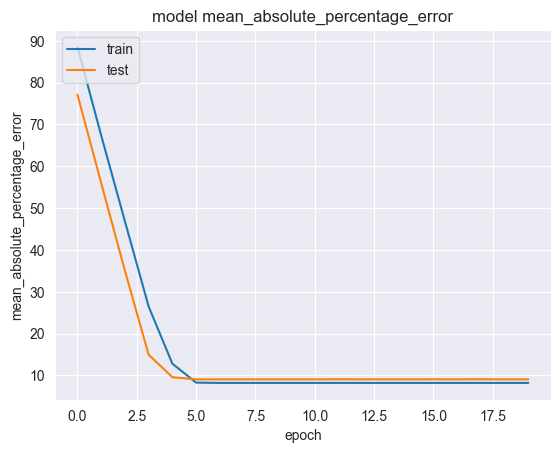

In [29]:
# Summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

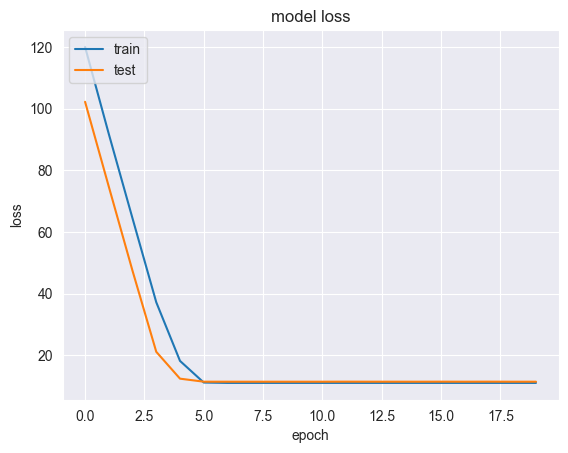

In [30]:
# Summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

### ***CHECKING CORRELATION*** ###

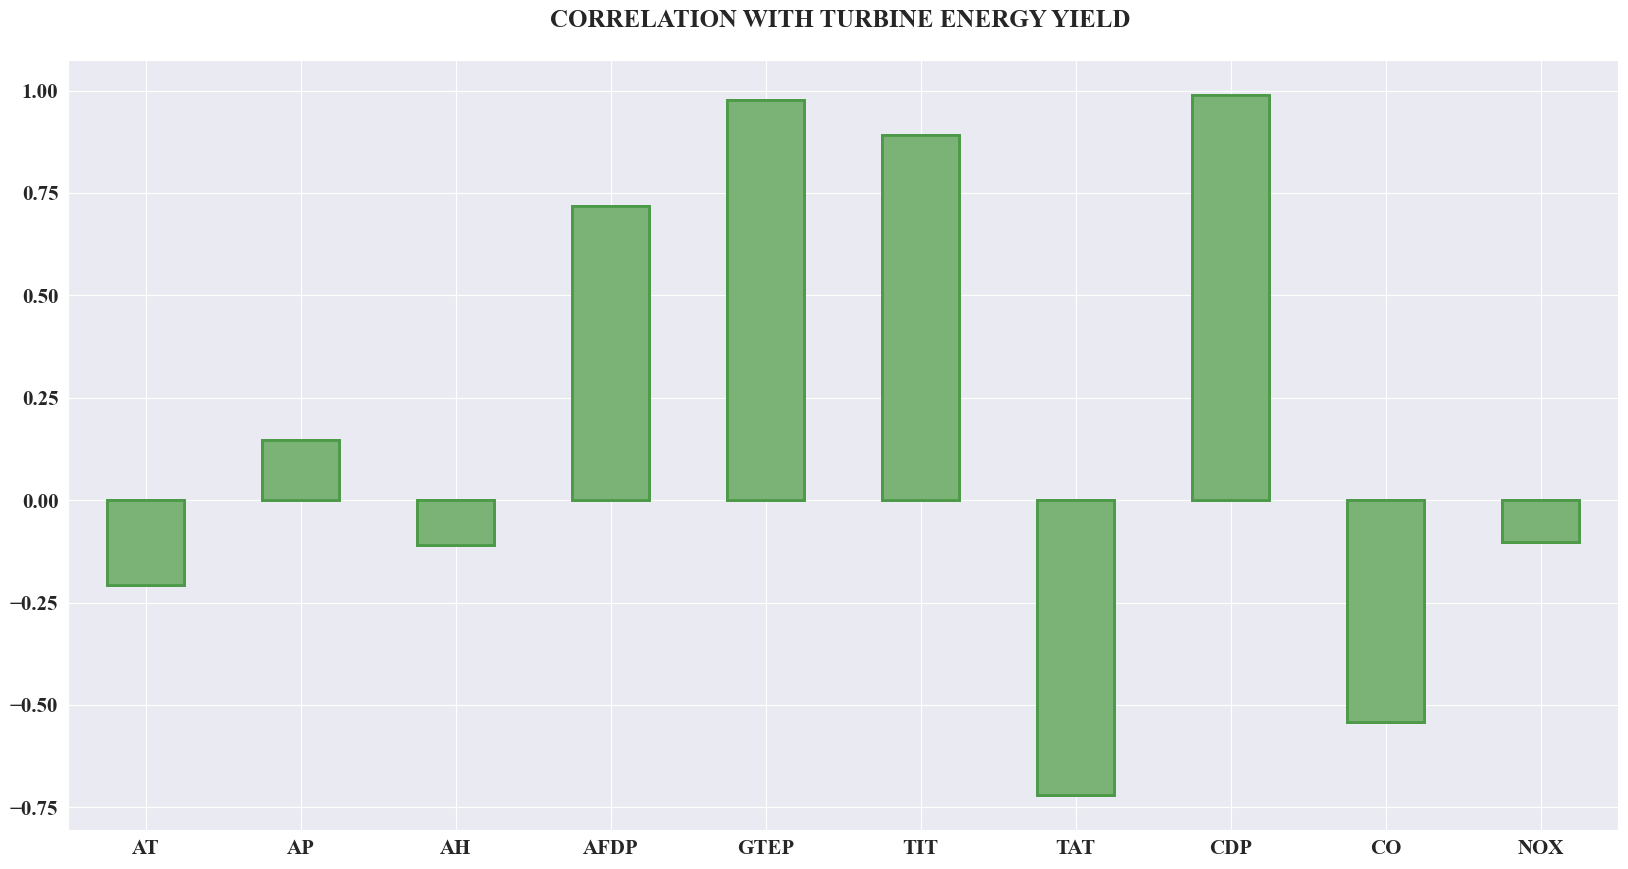

In [31]:
correlations = gt_data.corrwith(gt_data.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
correlations.plot.bar(figsize = (20, 10), fontsize = 15, color = '#7ab375', edgecolor='#4c9a47', linewidth=2, rot = 45, grid = True)
plt.title('CORRELATION WITH TURBINE ENERGY YIELD \n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xticks(fontfamily = "Times New Roman", weight='bold', size=15, rotation=0)
plt.yticks(fontfamily = "Times New Roman", weight='bold', size=15)
plt.show()

### **FEATURE SELECTION TECHNIQUE** ###

In [32]:
# Defining x and y attributes
x = gt_data.drop('TEY', axis=1)
y = gt_data[['TEY']]

In [33]:
# Feature extraction
from sklearn.feature_selection import SelectKBest, mutual_info_regression
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit_gt_feat = test.fit(x, y)

In [34]:
# Summarize scores
scores = fit_gt_feat.scores_
features = fit_gt_feat.transform(x)

In [35]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score Feature
7  1.712898     CDP
4  1.599200    GTEP
5  1.323200     TIT
6  0.894752     TAT
3  0.660652    AFDP
8  0.511796      CO
0  0.412474      AT
9  0.300629     NOX
1  0.139143      AP
2  0.097517      AH

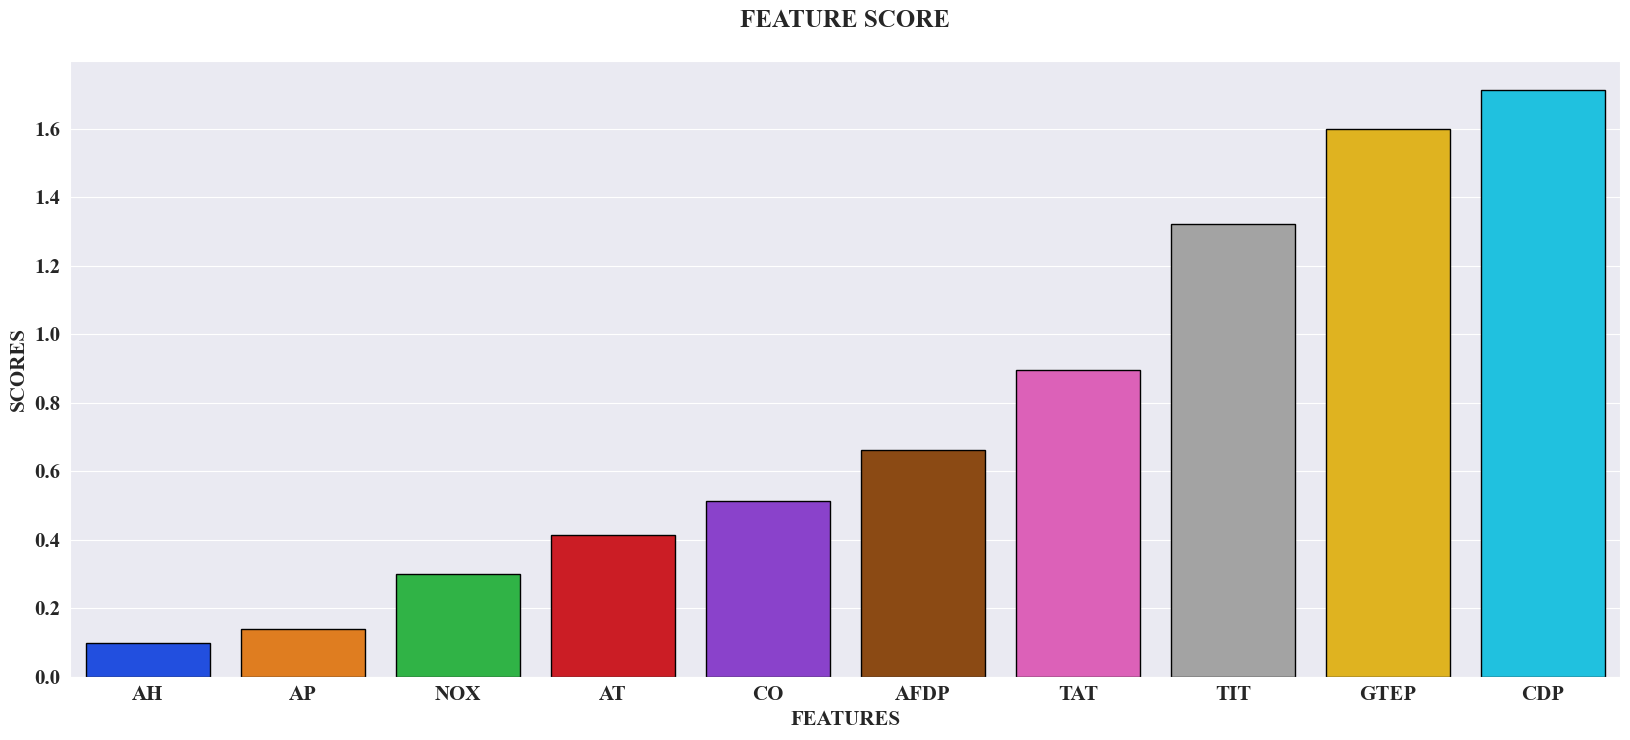

In [36]:
# Creating a chart with the Feature Score

plt.figure(figsize=(20,8))
# make barplot and sort bars
palette_color = sns.color_palette('bright')
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature, palette=palette_color, edgecolor="#000000", linewidth=1,)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.xticks(fontfamily = "Times New Roman", weight='bold', size=15, rotation=0)
plt.yticks(fontfamily = "Times New Roman", weight='bold', size=15)
plt.title('FEATURE SCORE\n', horizontalalignment="center", weight='bold', fontfamily = "Times New Roman", size = '18')
plt.xlabel('FEATURES', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.ylabel('SCORES', weight='bold', fontfamily = "Times New Roman", size = '15')
plt.show()

In [37]:
# Data taken for consideration is only the top 7 columns excluding 'NOX', 'AP' and 'AH'
input_data = gt_data[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT']]
input_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978

In [38]:
# Target data
target_data = gt_data[['TEY']]
target_data

TEY
0      114.70
1      114.72
2      114.71
3      114.72
4      114.72
...       ...
15034  111.61
15035  111.78
15036  110.19
15037  110.74
15038  111.58

[15039 rows x 1 columns]

### ***Categorizing Training and Testing Sets*** ###

In [39]:
# Splitting input_data and target_data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.3, random_state=3)

### **HYPERPARAMETER TUNING: OPTIMAL BATCH SIZE, NUMBER OF EPOCHS** ###

In [40]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [41]:
from scikeras.wrappers import KerasRegressor
model1 = KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [42]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................


[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.954 total time=  12.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.981 total time=  11.8s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.992 total time=  11.5s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.983 total time=  10.7s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.644 total time=  11.3s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;, score=0.981 total time=  50.5s
[CV 2/5; 2/16] START batch_size=10, epochs=50...................................
[CV 2/5; 2/16] END ....batch

In [43]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9913856329243211, using {'batch_size': 20, 'epochs': 100}
0.9108747310134986,0.13395039203227696 with {'batch_size': 10, 'epochs': 10}
0.9774012927971423,0.008939511779096373 with {'batch_size': 10, 'epochs': 50}
0.9878043036930959,0.01375714422759155 with {'batch_size': 10, 'epochs': 100}
0.9864819414025249,0.014467071879604278 with {'batch_size': 10, 'epochs': 200}
0.9660760603911485,0.021207123038956506 with {'batch_size': 20, 'epochs': 10}
0.9876948766138895,0.009851104170600734 with {'batch_size': 20, 'epochs': 50}
0.9913856329243211,0.003394028952438193 with {'batch_size': 20, 'epochs': 100}
0.9852695208963815,0.009506195743501988 with {'batch_size': 20, 'epochs': 200}
0.9762537179692439,0.009003382348518876 with {'batch_size': 40, 'epochs': 10}
0.9908396218506346,0.004312870802555031 with {'batch_size': 40, 'epochs': 50}
0.9846607472115638,0.012348773391531365 with {'batch_size': 40, 'epochs': 100}
0.9863623676615028,0.009560840299147506 with {'batch_size': 40, 'epochs': 

### **HYPERPARAMETER TUNING: OPTIMAL DROPOUT RATE** ###

In [44]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [45]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

### ***Scaling the data using StandardScaler*** ###

In [46]:
#assigning predictor variables to x and response variable to y
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [47]:

# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 2s 4ms/step - loss: 17625.6895 - mae: 131.7984 - mse: 17625.6895 - val_loss: 16797.4102 - val_mae: 128.6443 - val_mse: 16797.4082
Epoch 2/100
169/169 [==============================] - 0s 3ms/step - loss: 16306.0820 - mae: 126.6997 - mse: 16306.0820 - val_loss: 15752.5098 - val_mae: 124.5170 - val_mse: 15752.5098
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15335.5771 - mae: 122.8121 - mse: 15335.5771 - val_loss: 14836.9805 - val_mae: 120.7849 - val_mse: 14836.9805
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14452.9834 - mae: 119.1643 - mse: 14452.9834 - val_loss: 13985.7559 - val_mae: 117.2082 - val_mse: 13985.7559
Epoch 5/100
169/169 [==============================] - 1s 4ms/step - loss: 13625.0605 - mae: 115.6405 - mse: 13625.0605 - val_loss: 13182.3174 - val_mae: 113.7292 - val_mse: 13182.3174
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 

In [48]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.929264
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.526866
dtype: float64
94/94 [==============================] - 0s 3ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.516385
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.71062
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    80.99036
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    97.575631
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.618231
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.629414
dtype: float64
94/94 [===============

batchsize  epochs                         Accuracy
0          5       5  TEY    97.929264
dtype: float64
0          5      10  TEY    99.526866
dtype: float64
0          5      50  TEY    99.516385
dtype: float64
0          5     100   TEY    99.71062
dtype: float64
0         10       5   TEY    80.99036
dtype: float64
0         10      10  TEY    97.575631
dtype: float64
0         10      50  TEY    99.618231
dtype: float64
0         10     100  TEY    99.629414
dtype: float64
0         15       5  TEY    58.741366
dtype: float64
0         15      10  TEY    89.808766
dtype: float64
0         15      50  TEY    99.641043
dtype: float64
0         15     100  TEY    99.662829
dtype: float64
0         20       5  TEY    46.144881
dtype: float64
0         20      10  TEY    80.890229
dtype: float64
0         20      50  TEY    99.671451
dtype: float64
0         20     100   TEY    99.67664
dtype: float64

#### **Training Model - using best params** ####

In [49]:
finalParamTable

batchsize  epochs                         Accuracy
0          5       5  TEY    97.929264
dtype: float64
0          5      10  TEY    99.526866
dtype: float64
0          5      50  TEY    99.516385
dtype: float64
0          5     100   TEY    99.71062
dtype: float64
0         10       5   TEY    80.99036
dtype: float64
0         10      10  TEY    97.575631
dtype: float64
0         10      50  TEY    99.618231
dtype: float64
0         10     100  TEY    99.629414
dtype: float64
0         15       5  TEY    58.741366
dtype: float64
0         15      10  TEY    89.808766
dtype: float64
0         15      50  TEY    99.641043
dtype: float64
0         15     100  TEY    99.662829
dtype: float64
0         20       5  TEY    46.144881
dtype: float64
0         20      10  TEY    80.890229
dtype: float64
0         20      50  TEY    99.671451
dtype: float64
0         20     100   TEY    99.67664
dtype: float64

In [50]:
final = finalParamTable.copy()

In [51]:
accuracy = []
accuracy = final["Accuracy"].to_list()

In [52]:
import re
pattern = r"\s*TEY\s+([0-9,\.]+)\n(dtype: float64)"
pattern2 = r"(TEY\s+)([0-9,\.]+)"
accuracy_final = []

for ele in accuracy:
    elst = ele.to_string() 
    fe = re.sub(pattern, r"\1", elst)
    fes = re.sub(pattern2, r"\2",fe)
    accuracy_final.append(fes)

In [53]:
final['Accuracy'] = accuracy_final

In [54]:
final['Accuracy'] = final['Accuracy'].astype(float)

In [55]:
final = final.reset_index(drop=True)

In [56]:
final.iloc[final['Accuracy'].idxmax()]

batchsize      5.00000
epochs       100.00000
Accuracy      99.71062
Name: 3, dtype: float64

### **MODEL EVALUATION TRAIN AND TEST ERROR** ###

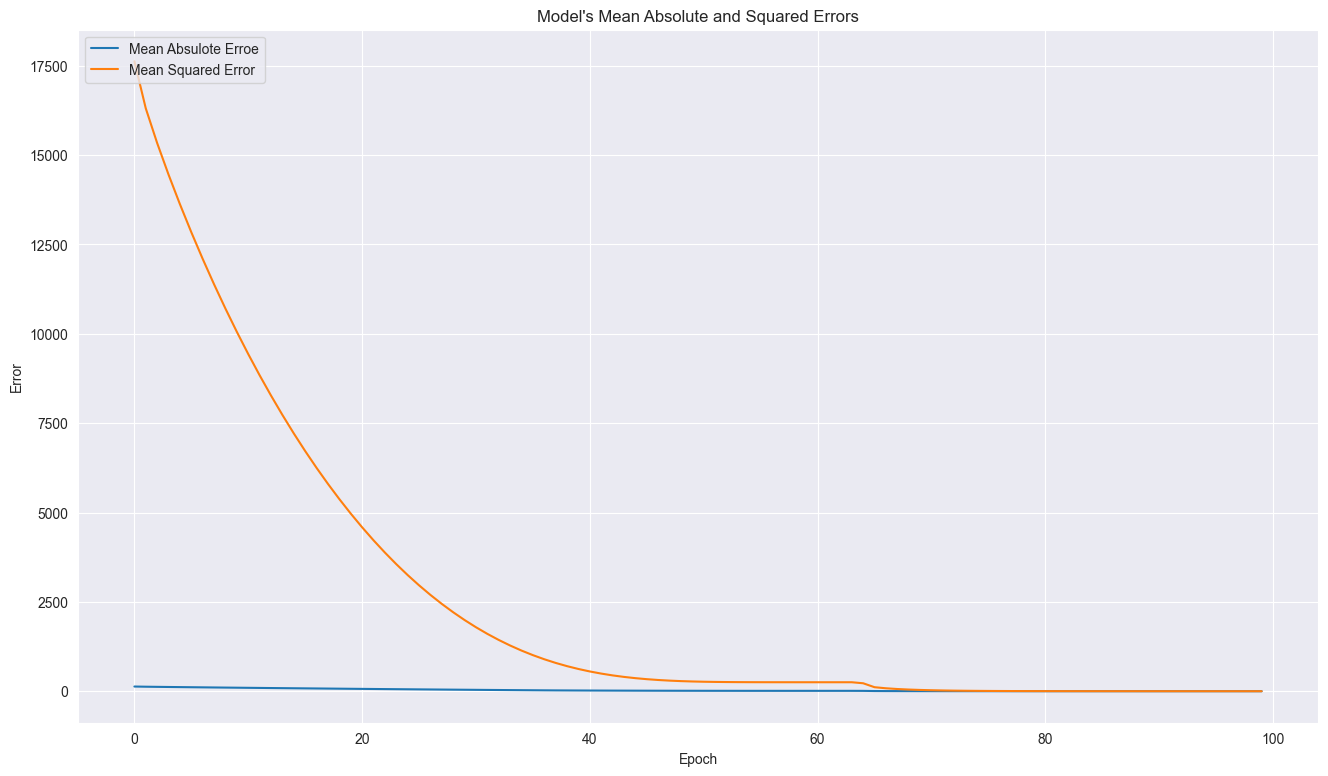

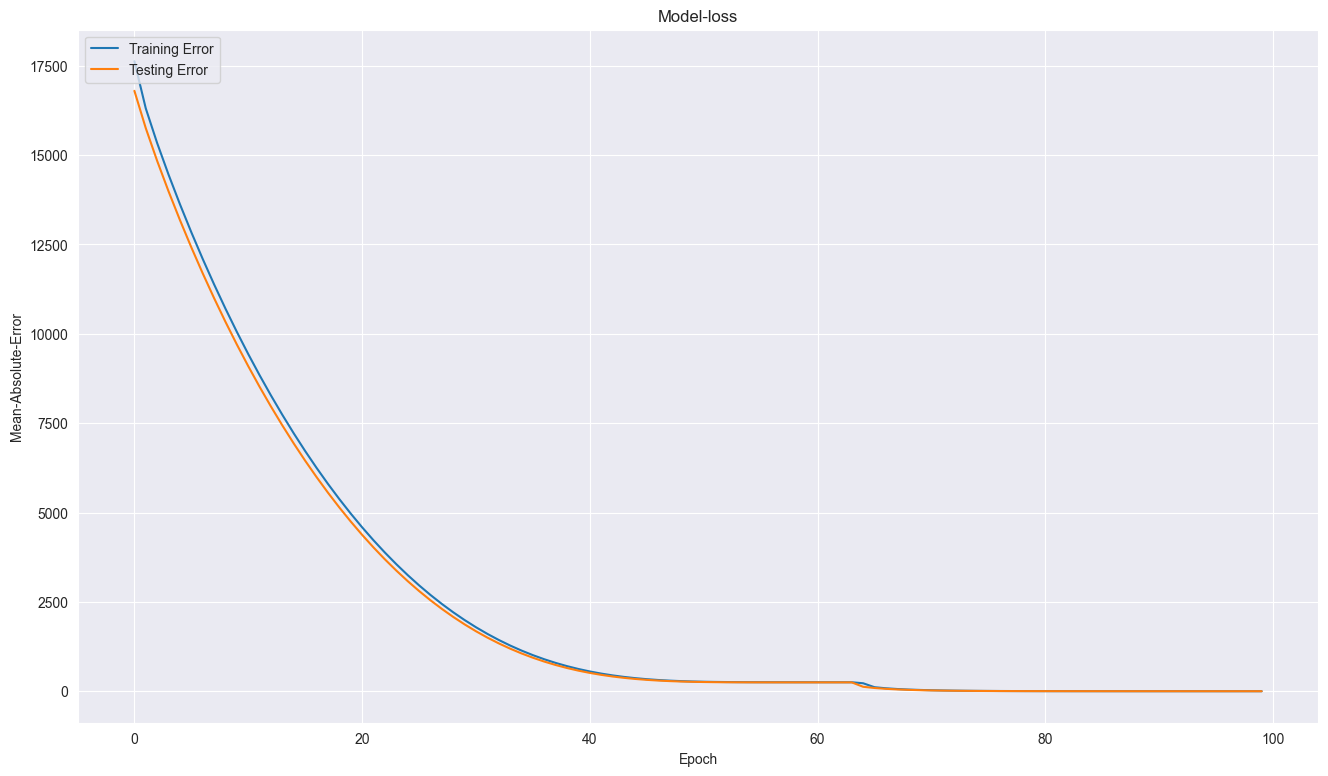

In [57]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

### **PREDICTING VALUES FROM MODEL USING SAME DATASET** ###

In [58]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 2ms/step
(3008, 9)


CDP    GTEP     TIT     TAT    AFDP        CO       AT  Actual  \
13312  12.219  25.762  1092.5  550.25  4.0023   1.26430  24.0930  134.46   
12627  10.791  20.085  1059.6  549.94  3.2106   2.69370  20.4500  111.88   
6393   12.126  25.221  1089.9  549.62  4.5325   1.96250  20.2620  133.72   
4990   12.218  25.965  1092.9  549.96  4.4266   1.57120  26.8620  133.79   
12462  10.466  19.688  1056.9  550.01  3.1241   2.29960  19.4090  110.77   
7405   10.624  19.387  1058.9  550.17  3.3709   4.27640   2.2158  113.32   
10993  12.088  25.392  1089.7  550.11  3.7871   0.83578  23.8520  133.77   
9488   11.498  23.225  1079.4  549.60  4.2837   2.01980  12.3950  128.98   
14201  13.971  32.518  1100.1  528.98  5.1559   0.87760  12.3590  159.42   
9757   13.862  32.105  1100.0  530.69  5.9309  10.75000   8.6376  161.86   

        Predicted  
13312  134.611511  
12627  112.991127  
6393   134.293701  
4990   134.229080  
12462  111.535133  
7405   114.626923  
10993  133.724533  
9488   129.188812  
14201  160.817398  
9757   162.002487

In [59]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

### **CALCULATING ABSOLUTE PERCENT ERROR AND ERROR** ###

In [60]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.54794585005887


Actual   Predicted     APE %
13312  134.46  134.611511  0.112681
12627  111.88  112.991127  0.993142
6393   133.72  134.293701  0.429032
4990   133.79  134.229080  0.328186
12462  110.77  111.535133  0.690741

In [61]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

Actual   Predicted     APE %     Error
0     134.46  134.611511  0.112681 -0.001127
1     111.88  112.991127  0.993142 -0.009931
2     133.72  134.293701  0.429032 -0.004290
3     133.79  134.229080  0.328186 -0.003282
4     110.77  111.535133  0.690741 -0.006907
...      ...         ...       ...       ...
3003  119.25  119.705345  0.381841 -0.003818
3004  133.74  134.232742  0.368433 -0.003684
3005  146.31  147.070206  0.519586 -0.005196
3006  150.07  150.521301  0.300727 -0.003007
3007  111.77  111.757423  0.011252  0.000113

[3008 rows x 4 columns]

### **MODEL VALIDATION - VISUALIZATION OF RELATIONSHIP BETWEEN ACTUAL AND PREDICTED** ###

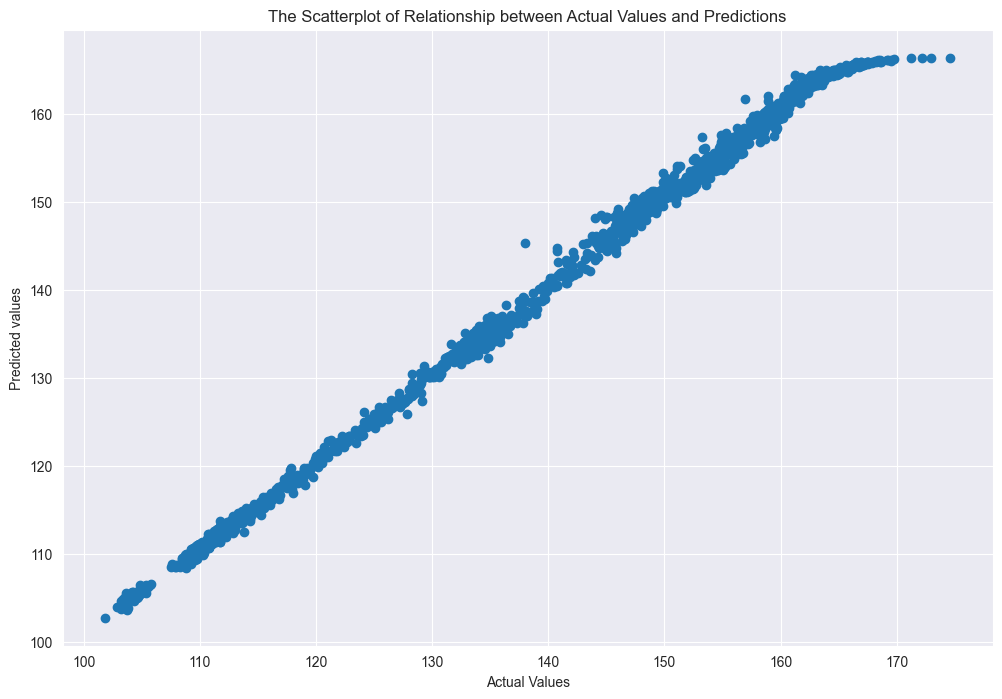

In [62]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [63]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.6094267733553625
MSE: 0.711360205406912
RMSE: 0.8434217245286678


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9976934778219965
R2_score (test):  0.9971589868147127


In [66]:
#Evaluation of  the explained variance score (R^2)
print(f'This shows that our model predicts {np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)}% of the target correctly')
#.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows that our model predicts 99.76% of the target correctly


### **RESIDUAL ANALYSIS** ###

<Axes: ylabel='Density'>

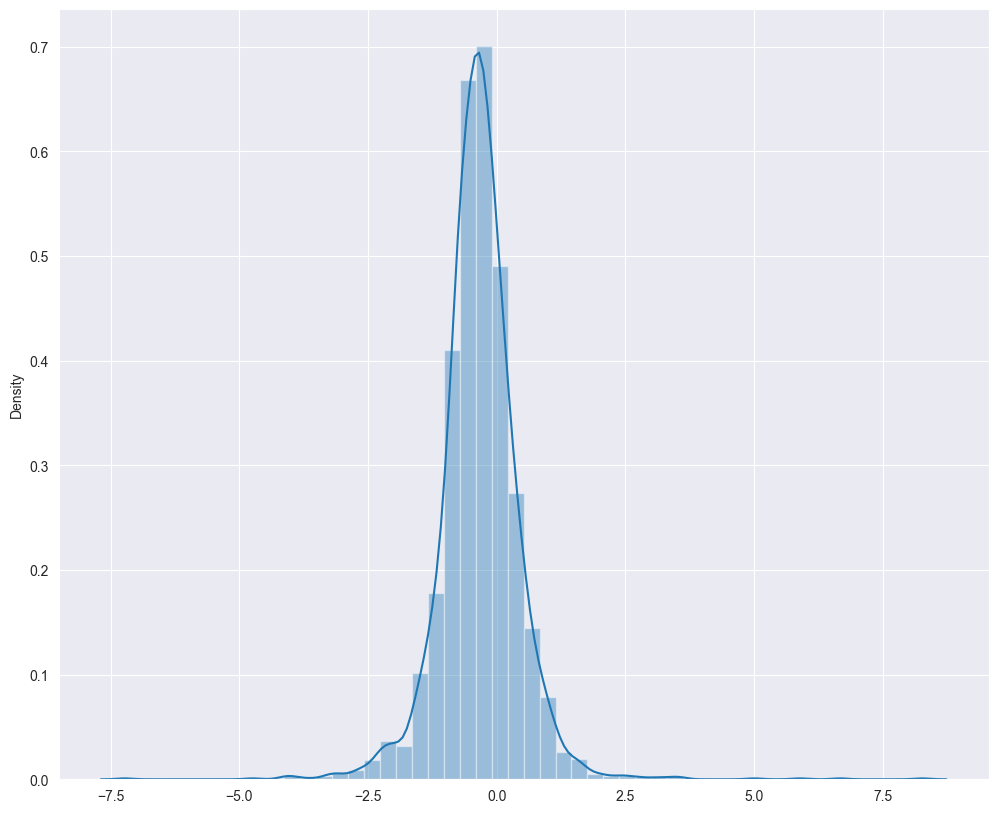

In [67]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

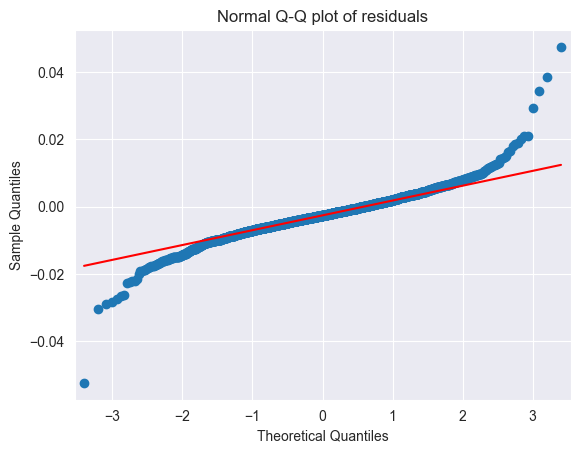

In [68]:
# Residuals values  = y - yhat
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()